**ASSIGNMENT 6 & 7**

Name: Rohan Shirodkar

Roll no: 18110142

**CODE WORD: DEV**


Collaboration: Codes used from Repository, Reference codes by Suraj, my past submissions and functions from Aarishs past submissions

Q1: Desired Trajectory

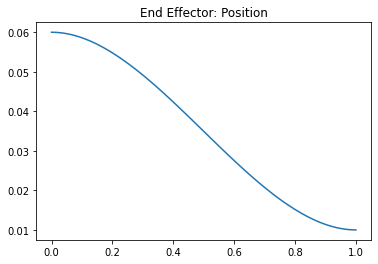

In [ ]:
# Importing libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks,time):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks
    self.time = time

  def inverse_kinematics(self, endeffector_position):
    r = (endeffector_position[0]**2 + endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(endeffector_position[1],endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.lengthsoflinks[2] - endeffector_position[2]
    return (theta1, theta2, d3)

  def cubic(self, x0, xf, x0dot, xfdot, t0, tf): # gives cubic polynomial coeff for single joint
    T = np.array([[1, t0, t0**2, t0**3],[0, 1, 2 * t0, 3 * t0**2],[1, tf, tf**2, tf**3],[0, 1, 2 * tf, 3 * tf**2]])
    x = np.array([[x0],[x0dot],[xf],[xfdot]])
    a = np.matmul(np.linalg.inv(T),x)
    return a

  def plot_trajectory(self):
    # Calculating q_desired for initial and final position
    q0 = self.inverse_kinematics(self.initial_position)
    q1 = self.inverse_kinematics(self.final_position)
    q1_poly = self.cubic(q0[0], q1[0], 0, 0, 0, self.time)
    q2_poly = self.cubic(q0[1], q1[1], 0, 0, 0, self.time)
    q3_poly = self.cubic(q0[2], q1[2], 0, 0, 0, self.time)

    t = np.linspace(0, self.time, 100)

    # Plot for Joint 1
    joint1_desired_position = q1_poly[0] + q1_poly[1] * t + q1_poly[2] * t**2 + q1_poly[3] * t**3
    joint1_desired_velocity = q1_poly[1] + 2 * q1_poly[2] * t + 3 * q1_poly[3] * t**2
    joint1_desired_acceleration = 2 * q1_poly[2] + 6 * q1_poly[3] * t

    # plt.figure()
    # plt.plot(t, joint1_desired_position)
    # plt.title("Joint 1(Revolute): Position")
    # plt.figure()
    # plt.plot(t, joint1_desired_velocity)
    # plt.title("Joint 1(Revolute): Velocity")
    # plt.figure()
    # plt.plot(t, joint1_desired_acceleration)
    # plt.title("Joint 1(Revolute): Acceleration")

    # Plot for Joint 2
    joint2_desired_position = q2_poly[0] + q2_poly[1] * t + q2_poly[2] * t**2 + q2_poly[3] * t**3
    joint2_desired_velocity = q2_poly[1] + 2 * q2_poly[2] * t + 3 * q2_poly[3] * t**2
    joint2_desired_acceleration = 2 * q2_poly[2] + 6 * q2_poly[3] * t
    
    # plt.figure()
    # plt.plot(t, joint2_desired_position)
    # plt.title("Joint 2(Revolute): Position")
    # plt.figure()
    # plt.plot(t, joint2_desired_velocity)
    # plt.title("Joint 2(Revolute): Velocity")
    # plt.figure()
    # plt.plot(t, joint2_desired_acceleration)
    # plt.title("Joint 2(Revolute): Acceleration")

    # Plot for Joint 3
    joint3_desired_position = q3_poly[0] + q3_poly[1] * t + q3_poly[2] * t**2 + q3_poly[3] * t**3
    joint3_desired_velocity = q3_poly[1] + 2 * q3_poly[2] * t + 3 * q3_poly[3] * t**2
    joint3_desired_acceleration = 2 * q3_poly[2] + 6 * q3_poly[3] * t
    
    # plt.figure()
    # plt.plot(t, joint3_desired_position)
    # plt.title("Joint 3(Prismatic): Position")
    # plt.figure()
    # plt.plot(t, joint3_desired_velocity)
    # plt.title("Joint 3(Prismatic): Velocity")
    # plt.figure()
    # plt.plot(t, joint3_desired_acceleration)
    # plt.title("Joint 3(Prismatic): Acceleration")
    # plt.show()
    
    endeffector_position  = endeffector_velocity = [0] * 100
    for i in range(0,100):
      endeffector_position[i] = self.forward_kinematics(joint1_desired_position[i],joint2_desired_position[i],joint3_desired_position[i])

    plt.figure()
    plt.plot(t, endeffector_position)
    plt.title("End Effector: Position")
    # plt.figure()
    # plt.plot(t, endeffector_velocity)
    # plt.title("End Effector: Velocity")
    # plt.figure()
    # plt.plot(t, endeffector_acceleration)
    # plt.title("End Effector: Acceleration")
    plt.show()

  def joint_velocities(self, xdot, ydot, zdot):
    Xdot = np.array([[xdot],[ydot],[zdot]])
    qdot = np.linalg.pinv(self.J_v) @ Xdot
    return qdot
    
  def forward_kinematics(self, theta1, theta2, d3):
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T

    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print(np.shape(self.J_v))
    return (self.On[-1][1])

# DRIVER CODE
A = [0.4,0.06,0.1] # Initial Position
B = [0.4,0.01,0.1] # Final Position
C = [0.25,0.25,0.25] #lengths of links 

SCARA = Robot(A,B,C,1)
SCARA.plot_trajectory()

Q2: Joint Trajectories

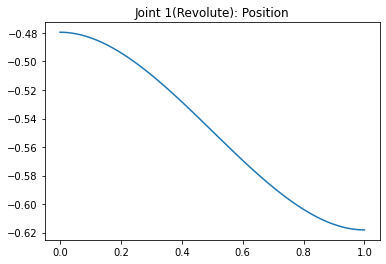

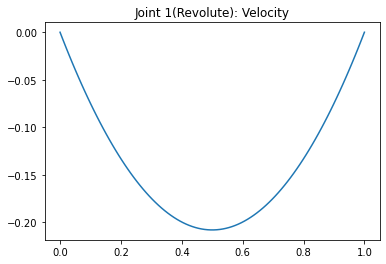

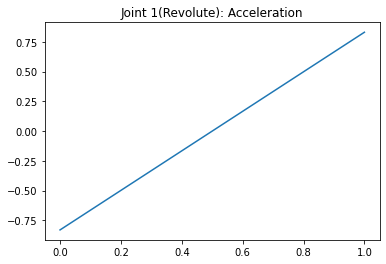

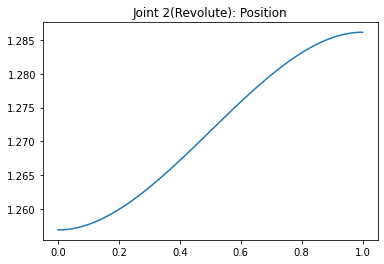

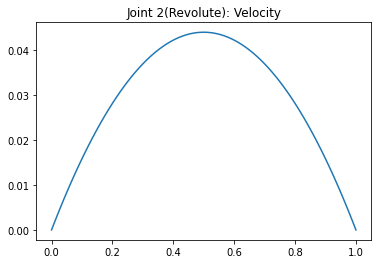

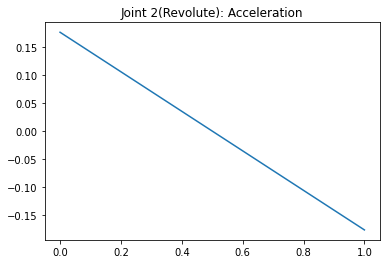

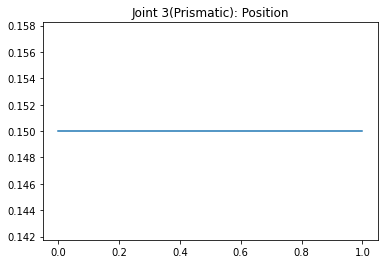

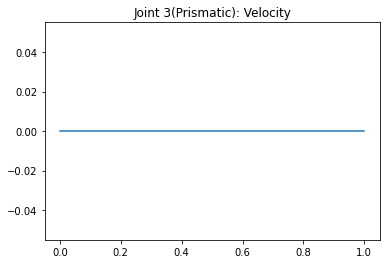

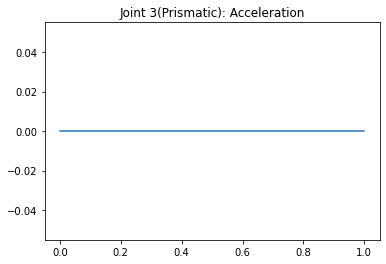

In [ ]:
# Importing libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks,time):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks
    self.time = time

  def inverse_kinematics(self, endeffector_position):
    r = (endeffector_position[0]**2 + endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(endeffector_position[1],endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.lengthsoflinks[2] - endeffector_position[2]
    return (theta1, theta2, d3)

  def cubic(self, x0, xf, x0dot, xfdot, t0, tf): # gives cubic polynomial coeff for single joint
    T = np.array([[1, t0, t0**2, t0**3],[0, 1, 2 * t0, 3 * t0**2],[1, tf, tf**2, tf**3],[0, 1, 2 * tf, 3 * tf**2]])
    x = np.array([[x0],[x0dot],[xf],[xfdot]])
    a = np.matmul(np.linalg.inv(T),x)
    return a

  def plot_trajectory(self):
    # Calculating q_desired for initial and final position
    q0 = self.inverse_kinematics(self.initial_position)
    q1 = self.inverse_kinematics(self.final_position)
    q1_poly = self.cubic(q0[0], q1[0], 0, 0, 0, self.time)
    q2_poly = self.cubic(q0[1], q1[1], 0, 0, 0, self.time)
    q3_poly = self.cubic(q0[2], q1[2], 0, 0, 0, self.time)

    t = np.linspace(0, self.time, 100)

    # Plot for Joint 1
    joint1_desired_position = q1_poly[0] + q1_poly[1] * t + q1_poly[2] * t**2 + q1_poly[3] * t**3
    joint1_desired_velocity = q1_poly[1] + 2 * q1_poly[2] * t + 3 * q1_poly[3] * t**2
    joint1_desired_acceleration = 2 * q1_poly[2] + 6 * q1_poly[3] * t

    plt.figure()
    plt.plot(t, joint1_desired_position)
    plt.title("Joint 1(Revolute): Position")
    plt.figure()
    plt.plot(t, joint1_desired_velocity)
    plt.title("Joint 1(Revolute): Velocity")
    plt.figure()
    plt.plot(t, joint1_desired_acceleration)
    plt.title("Joint 1(Revolute): Acceleration")

    # Plot for Joint 2
    joint2_desired_position = q2_poly[0] + q2_poly[1] * t + q2_poly[2] * t**2 + q2_poly[3] * t**3
    joint2_desired_velocity = q2_poly[1] + 2 * q2_poly[2] * t + 3 * q2_poly[3] * t**2
    joint2_desired_acceleration = 2 * q2_poly[2] + 6 * q2_poly[3] * t
    
    plt.figure()
    plt.plot(t, joint2_desired_position)
    plt.title("Joint 2(Revolute): Position")
    plt.figure()
    plt.plot(t, joint2_desired_velocity)
    plt.title("Joint 2(Revolute): Velocity")
    plt.figure()
    plt.plot(t, joint2_desired_acceleration)
    plt.title("Joint 2(Revolute): Acceleration")

    # Plot for Joint 3
    joint3_desired_position = q3_poly[0] + q3_poly[1] * t + q3_poly[2] * t**2 + q3_poly[3] * t**3
    joint3_desired_velocity = q3_poly[1] + 2 * q3_poly[2] * t + 3 * q3_poly[3] * t**2
    joint3_desired_acceleration = 2 * q3_poly[2] + 6 * q3_poly[3] * t
    
    plt.figure()
    plt.plot(t, joint3_desired_position)
    plt.title("Joint 3(Prismatic): Position")
    plt.figure()
    plt.plot(t, joint3_desired_velocity)
    plt.title("Joint 3(Prismatic): Velocity")
    plt.figure()
    plt.plot(t, joint3_desired_acceleration)
    plt.title("Joint 3(Prismatic): Acceleration")
    plt.show()
    

# DRIVER CODE
A = [0.4,0.06,0.1] # Initial Position
B = [0.4,0.01,0.1] # Final Position
C = [0.25,0.25,0.25] #lengths of links 

SCARA = Robot(A,B,C,1)
SCARA.plot_trajectory()

Q3: Controller Plots: (a) PD control with steady state error and damping ratio close to 1 

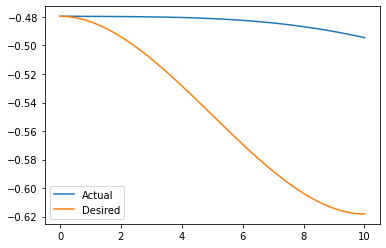

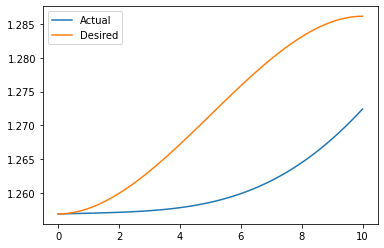

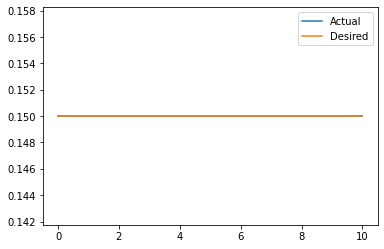

In [ ]:
# Importing Libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks,time):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks
    self.time = time

  # Function to calculate the angles of the initial and the final positions of the robot.
  def inverse_kinematics(self, endeffector_position):
    r = (endeffector_position[0]**2 + endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(endeffector_position[1],endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.lengthsoflinks[2] - endeffector_position[2]

    return (theta1, theta2, d3)
  
  def cubic(self, x0, xf, x0dot, xfdot, t0, tf): # gives cubic polynomial coeff for single joint
    T = np.array([[1, t0, t0**2, t0**3],[0, 1, 2 * t0, 3 * t0**2],[1, tf, tf**2, tf**3],[0, 1, 2 * tf, 3 * tf**2]])
    x = np.array([[x0],[x0dot],[xf],[xfdot]])
    a = np.matmul(np.linalg.inv(T),x)
    return a

  def plot_trajectory(self):
    # Calculating q_desired for initial and final position
    q0 = self.inverse_kinematics(self.initial_position)
    q1 = self.inverse_kinematics(self.final_position)
    q1_poly = self.cubic(q0[0], q1[0], 0, 0, 0, self.time)
    q2_poly = self.cubic(q0[1], q1[1], 0, 0, 0, self.time)
    q3_poly = self.cubic(q0[2], q1[2], 0, 0, 0, self.time)

    t = np.linspace(0, self.time, 100)

    # Plot for Joint 1
    self.joint1_desired_position = q1_poly[0] + q1_poly[1] * t + q1_poly[2] * t**2 + q1_poly[3] * t**3
    self.joint1_desired_velocity = q1_poly[1] + 2 * q1_poly[2] * t + 3 * q1_poly[3] * t**2
    self.joint1_desired_acceleration = 2 * q1_poly[2] + 6 * q1_poly[3] * t


    # Plot for Joint 2
    self.joint2_desired_position = q2_poly[0] + q2_poly[1] * t + q2_poly[2] * t**2 + q2_poly[3] * t**3
    self.joint2_desired_velocity = q2_poly[1] + 2 * q2_poly[2] * t + 3 * q2_poly[3] * t**2
    self.joint2_desired_acceleration = 2 * q2_poly[2] + 6 * q2_poly[3] * t
    

    # Plot for Joint 3
    self.joint3_desired_position = q3_poly[0] + q3_poly[1] * t + q3_poly[2] * t**2 + q3_poly[3] * t**3
    self.joint3_desired_velocity = q3_poly[1] + 2 * q3_poly[2] * t + 3 * q3_poly[3] * t**2
    self.joint3_desired_acceleration = 2 * q3_poly[2] + 6 * q3_poly[3] * t

  # PI control
  def Control_Tuning(self):
    # Defining Set points 
    [self.q1, self.q2, self.q3] = self.inverse_kinematics(self.initial_position)
    [self.q1d, self.q2d, self.q3d] = self.inverse_kinematics(self.final_position)

    # Constants to tune PD control
    self.Kp1 = 0.8
    self.Kp2 = 0.2
    self.Kp3 = 10
    self.Kd1 = 0.3
    self.Kd2 = 0.2
    self.Kd3 = 0.3


    # Proportional control
    self.tau1 = self.Kp1 * (self.q1d - self.q1)
    self.tau2 = self.Kp2 * (self.q2d - self.q2)
    self.tau3 = self.Kp3 * (self.q3d - self.q3) + 9.81 # Compensating for gravity
    
  def function(self,t,y):
    q1 = y[0]
    q2 = y[1]
    q3 = y[2]
    q1dot = y[3]
    q2dot = y[4]
    q3dot = y[5]
    l = [self.lengthsoflinks[0],self.lengthsoflinks[1]]
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.81
    I1 = I2 = I3 = 1
    I4 = 0
    m = [1,1,1,0] # masses of links
    alpha = I1 + r[0]**2 * m[0] + l[0]**2 *  (m[1] + m[2] + m[3])
    beta = I2 + I3 + I4 + l[1]**2 * m[2] + l[1]**2 * m[3] + m[1] * r[1]**2
    gamma = l[0] * l[1] * (m[2] + m[3]) + l[0] * m[1] * r[1] 
    delta = I3 + I4
    # M matrix values
    M = np.array([[alpha + beta + 2 * gamma * np.cos(q2), beta + gamma * np.cos(q2), 0],[beta + gamma * np.cos(q2),beta ,0],[0,0,m[2]]])
    # C matrix values
    C = np.array([[-gamma * np.sin(q2) * q2dot,-gamma * np.sin(q2) * (q1dot + q2dot),0],[gamma * np.sin(q2) * q1dot,0,0],[0,0,0]])
    # G matrix 
    g = np.array([[0],[0],[m[2] * g]])

    torque = np.array([[self.tau1],[self.tau2],[self.tau3]])
    qdot = np.array([[q1dot],[q2dot],[q3dot]])
    qddot = np.linalg.inv(M)@(torque - C@qdot - g)
    dydt = np.vstack((qdot, qddot))

    return dydt
    
  def PD_Control(self):
    ode = scipy.integrate.ode(self.function).set_integrator('vode', nsteps=500, method='bdf')
    # t = self.time # Total time
    dt = 0.01 # Length of timestep
    state = [self.q1, self.q2, self.q3, 0, 0, 0]
    error_buffer_q1 = [self.q1d - self.q1] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q2 = [self.q2d - self.q2] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q3 = [self.q3d - self.q3] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 

    q1t = [self.q1]
    q2t = [self.q2]
    q3t = [self.q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]
    
    t = np.linspace(0, self.time, 100)
    
    for i in range(1, len(t)):
      time = t[i]
      ode.set_initial_value(state,time)
      newstate = ode.integrate(ode.t+dt)
      state = newstate

      if i==1:
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i] - state[0])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i] - state[1])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i] - state[2]) + 9.81

      if i>1 and i<len(t):
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i-1] - q1t[i-1]) + self.Kd1 * (self.joint1_desired_position[i-1] - q1t[i-1] - self.joint1_desired_position[i-2] + q1t[i-2])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i-1] - q2t[i-1]) + self.Kd2 * (self.joint2_desired_position[i-1] - q2t[i-1] - self.joint2_desired_position[i-2] + q2t[i-2])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i-1] - q3t[i-1]) + self.Kd3 * (self.joint3_desired_position[i-1] - q3t[i-1] - self.joint3_desired_position[i-2] + q3t[i-2]) + 9.81

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])
    
    plt.figure()
    plt.plot(t, q1t)
    plt.plot(t, self.joint1_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q2t)
    plt.plot(t, self.joint2_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q3t)
    plt.plot(t, self.joint3_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    

# DRIVER CODE: Initializing the conditions
A = [0.4,0.06,0.1] # Initial Position
B = [0.4,0.01,0.1] # Final Position
C = [0.25,0.25,0.25] #lengths of links 

# (a) PD control with steady state error and damping ratio close to 1
SCARA = Robot(A,B,C,10)
SCARA.plot_trajectory()
SCARA.Control_Tuning()
SCARA.PD_Control()

Q3: Controller Plots: (b) PD control with feedforward control using motor dynamics

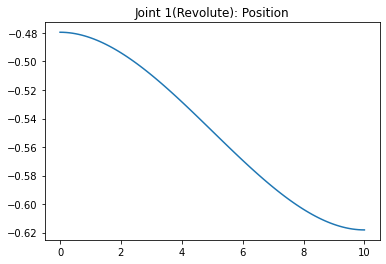

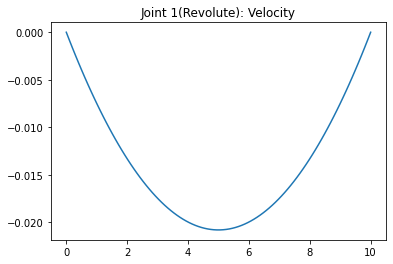

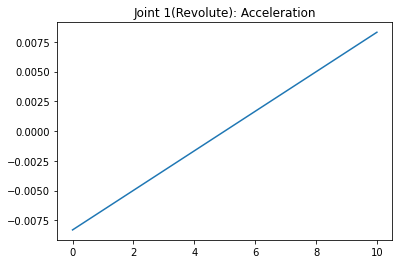

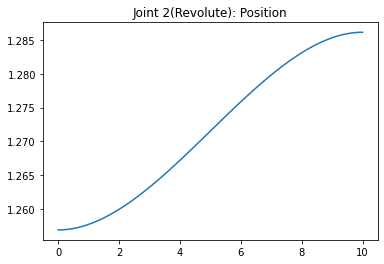

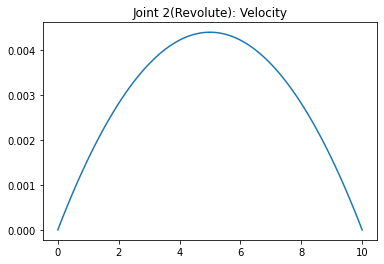

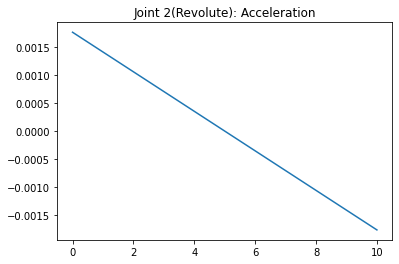

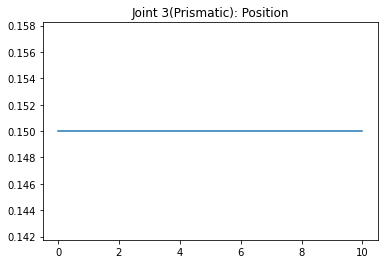

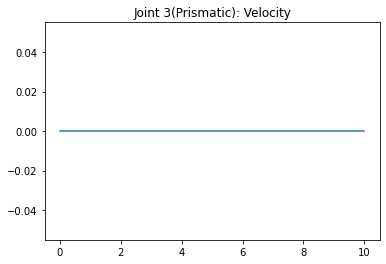

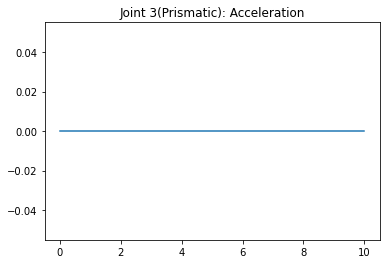

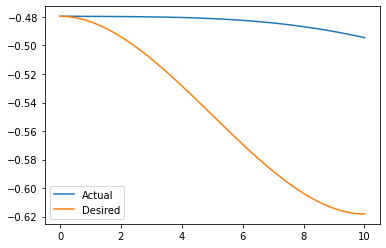

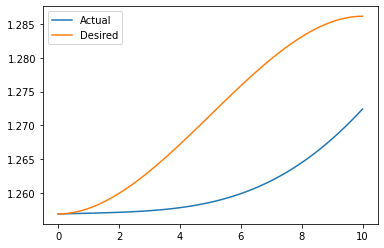

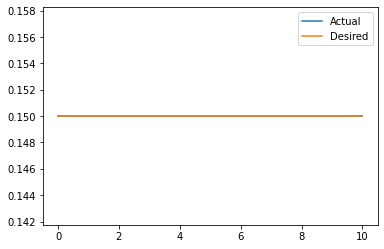

NameError: ignored

In [3]:
# Importing Libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks,time):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks
    self.time = time

  # Function to calculate the angles of the initial and the final positions of the robot.
  def inverse_kinematics(self, endeffector_position):
    r = (endeffector_position[0]**2 + endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(endeffector_position[1],endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.lengthsoflinks[2] - endeffector_position[2]

    return (theta1, theta2, d3)
  
  def cubic(self, x0, xf, x0dot, xfdot, t0, tf): # gives cubic polynomial coeff for single joint
    T = np.array([[1, t0, t0**2, t0**3],[0, 1, 2 * t0, 3 * t0**2],[1, tf, tf**2, tf**3],[0, 1, 2 * tf, 3 * tf**2]])
    x = np.array([[x0],[x0dot],[xf],[xfdot]])
    a = np.matmul(np.linalg.inv(T),x)
    return a

  def plot_trajectory(self):
    # Calculating q_desired for initial and final position
    q0 = self.inverse_kinematics(self.initial_position)
    q1 = self.inverse_kinematics(self.final_position)
    q1_poly = self.cubic(q0[0], q1[0], 0, 0, 0, self.time)
    q2_poly = self.cubic(q0[1], q1[1], 0, 0, 0, self.time)
    q3_poly = self.cubic(q0[2], q1[2], 0, 0, 0, self.time)

    t = np.linspace(0, self.time, 100)

    # Plot for Joint 1
    self.joint1_desired_position = q1_poly[0] + q1_poly[1] * t + q1_poly[2] * t**2 + q1_poly[3] * t**3
    self.joint1_desired_velocity = q1_poly[1] + 2 * q1_poly[2] * t + 3 * q1_poly[3] * t**2
    self.joint1_desired_acceleration = 2 * q1_poly[2] + 6 * q1_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint1_desired_position)
    plt.title("Joint 1(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint1_desired_velocity)
    plt.title("Joint 1(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint1_desired_acceleration)
    plt.title("Joint 1(Revolute): Acceleration")

    # Plot for Joint 2
    self.joint2_desired_position = q2_poly[0] + q2_poly[1] * t + q2_poly[2] * t**2 + q2_poly[3] * t**3
    self.joint2_desired_velocity = q2_poly[1] + 2 * q2_poly[2] * t + 3 * q2_poly[3] * t**2
    self.joint2_desired_acceleration = 2 * q2_poly[2] + 6 * q2_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint2_desired_position)
    plt.title("Joint 2(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint2_desired_velocity)
    plt.title("Joint 2(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint2_desired_acceleration)
    plt.title("Joint 2(Revolute): Acceleration")
    

    # Plot for Joint 3
    self.joint3_desired_position = q3_poly[0] + q3_poly[1] * t + q3_poly[2] * t**2 + q3_poly[3] * t**3
    self.joint3_desired_velocity = q3_poly[1] + 2 * q3_poly[2] * t + 3 * q3_poly[3] * t**2
    self.joint3_desired_acceleration = 2 * q3_poly[2] + 6 * q3_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint3_desired_position)
    plt.title("Joint 3(Prismatic): Position")
    plt.figure()
    plt.plot(t, self.joint3_desired_velocity)
    plt.title("Joint 3(Prismatic): Velocity")
    plt.figure()
    plt.plot(t, self.joint3_desired_acceleration)
    plt.title("Joint 3(Prismatic): Acceleration")
    plt.show()
    
  def joint_velocities(self, xdot, ydot, zdot):
    Xdot = np.array([[xdot],[ydot],[zdot]])
    qdot = np.linalg.pinv(self.J_v) @ Xdot
    return qdot

  def forward_kinematics(self, theta1, theta2, d3):
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T

    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print(np.shape(self.J_v))
    return (self.On[-1][1])

    
  # PI control
  def Control_Tuning(self):
    # Defining Set points 
    [self.q1, self.q2, self.q3] = self.inverse_kinematics(self.initial_position)
    [self.q1d, self.q2d, self.q3d] = self.inverse_kinematics(self.final_position)

    # Constants to tune PD control
    self.Kp1 = 0.8
    self.Kp2 = 0.2
    self.Kp3 = 10
    self.Kd1 = 0.3
    self.Kd2 = 0.2
    self.Kd3 = 0.3


    # Proportional control
    self.tau1 = self.Kp1 * (self.q1d - self.q1)
    self.tau2 = self.Kp2 * (self.q2d - self.q2)
    self.tau3 = self.Kp3 * (self.q3d - self.q3) + 9.81 # Compensating for gravity
    
  def function(self,t,y):
    q1 = y[0]
    q2 = y[1]
    q3 = y[2]
    q1dot = y[3]
    q2dot = y[4]
    q3dot = y[5]
    l = [self.lengthsoflinks[0],self.lengthsoflinks[1]]
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.81
    I1 = I2 = I3 = 1
    I4 = 0
    m = [1,1,1,0] # masses of links
    alpha = I1 + r[0]**2 * m[0] + l[0]**2 *  (m[1] + m[2] + m[3])
    beta = I2 + I3 + I4 + l[1]**2 * m[2] + l[1]**2 * m[3] + m[1] * r[1]**2
    gamma = l[0] * l[1] * (m[2] + m[3]) + l[0] * m[1] * r[1] 
    delta = I3 + I4
    # M matrix values
    M = np.array([[alpha + beta + 2 * gamma * np.cos(q2), beta + gamma * np.cos(q2), 0],[beta + gamma * np.cos(q2),beta ,0],[0,0,m[2]]])
    # C matrix values
    C = np.array([[-gamma * np.sin(q2) * q2dot,-gamma * np.sin(q2) * (q1dot + q2dot),0],[gamma * np.sin(q2) * q1dot,0,0],[0,0,0]])
    # G matrix 
    g = np.array([[0],[0],[m[2] * g]])

    torque = np.array([[self.tau1],[self.tau2],[self.tau3]])
    qdot = np.array([[q1dot],[q2dot],[q3dot]])
    qddot = np.linalg.inv(M)@(torque - C@qdot - g)
    dydt = np.vstack((qdot, qddot))

    return dydt
    
  def PD_Control(self):
    ode = scipy.integrate.ode(self.function).set_integrator('vode', nsteps=500, method='bdf')
    # t = self.time # Total time
    dt = 0.01 # Length of timestep
    state = [self.q1, self.q2, self.q3, 0, 0, 0]
    error_buffer_q1 = [self.q1d - self.q1] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q2 = [self.q2d - self.q2] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q3 = [self.q3d - self.q3] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 

    q1t = [self.q1]
    q2t = [self.q2]
    q3t = [self.q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]
    
    t = np.linspace(0, self.time, 100)
    
    for i in range(1, len(t)):
      time = t[i]
      ode.set_initial_value(state,time)
      newstate = ode.integrate(ode.t+dt)
      state = newstate

      if i==1:
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i] - state[0])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i] - state[1])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i] - state[2]) + 9.81

      if i>1 and i<len(t):
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i-1] - q1t[i-1]) + self.Kd1 * (self.joint1_desired_position[i-1] - q1t[i-1] - self.joint1_desired_position[i-2] + q1t[i-2])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i-1] - q2t[i-1]) + self.Kd2 * (self.joint2_desired_position[i-1] - q2t[i-1] - self.joint2_desired_position[i-2] + q2t[i-2])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i-1] - q3t[i-1]) + self.Kd3 * (self.joint3_desired_position[i-1] - q3t[i-1] - self.joint3_desired_position[i-2] + q3t[i-2]) + 9.81

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])
    
    plt.figure()
    plt.plot(t, q1t)
    plt.plot(t, self.joint1_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q2t)
    plt.plot(t, self.joint2_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q3t)
    plt.plot(t, self.joint3_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()

  def get_diag_D(self, q2):
    I1 = 1
    I2 = 1
    I3 = 1
    m1 = 1
    m2 = 1
    m3 = 1
    l1 = 1
    l2 = 1
    alpha = I1 + m1*(l1/2)**2 + m2*l1**2 + m3*l1**2
    beta = I2 + I3 + m3*l2**2 + +m2*(l2/2)**2
    gamma = l1*l2*m3 + (m2*l1*l2)/2
    d11 = alpha+beta+2*gamma*np.cos(q2)
    d22 = beta
    d33 = m3
    return (d11, d22, d33)


  def ff(self):
    t0 = linspace(0,self.time,100)
    A = np.array([[1,t0,t0**2,t0**3],[0,1,2*t0,3*t0**2],[1,tf,tf**2,tf**3],[0,1,2*tf,3*tf**2]])
    q1_mat = np.array([[q10,0,q1f,0]])
    B1 = np.linalg.inv(A)@np.transpose(q1_mat)
    a01 = B1[0]
    a11 = B1[1]
    a21 = B1[2]
    a31 = B1[3]

    q2_mat = np.array([[q20,0,q2f,0]])
    B2 = np.linalg.inv(A)@np.transpose(q2_mat)
    a02 = B2[0]
    a12 = B2[1]
    a22 = B2[2]
    a32 = B2[3]

    q3_mat = np.array([[q30,0,q3f,0]])
    B3 = np.linalg.inv(A)@np.transpose(q3_mat)
    a03 = B3[0]
    a13 = B3[1]
    a23 = B3[2]
    a33 = B3[3]

    t = np.linspace(t0,self.time,1000)

    # Creating variable list
    theta1_trajectory = []
    theta2_trajectory = []
    d3_trajectory = []
    theta1dot_trajectory = []
    theta2dot_trajectory = []
    d3dot_trajectory = []
    theta1ddot_trajectory = []
    theta2ddot_trajectory = []
    d3ddot_trajectory = []

    for j in range(0,len(t)):
      theta1 = a01 + a11*t[j] + a21*t[j]**2 + a31*t[j]**3
      theta2 = a02 + a12*t[j] + a22*t[j]**2 + a32*t[j]**3
      d3 = a03 + a13*t[j] + a23*t[j]**2 + a33*t[j]**3

      theta1dot = a11 + 2*a21*t[j] + 3*a31*t[j]**2
      theta2dot = a12 + 2*a22*t[j] + 3*a32*t[j]**2
      d3dot = a13 + 2*a23*t[j] + 3*a33*t[j]**2

      theta1ddot = 2*a21 + 6*a31*t[j]
      theta2ddot = 2*a22 + 6*a32*t[j]
      d3ddot = 2*a23 + 6*a33*t[j]

      theta1_trajectory.append(theta1)
      theta2_trajectory.append(theta2)
      d3_trajectory.append(d3)

      theta1dot_trajectory.append(theta1dot)
      theta2dot_trajectory.append(theta2dot)
      d3dot_trajectory.append(d3dot)

      theta1ddot_trajectory.append(theta1ddot)
      theta2ddot_trajectory.append(theta2ddot)
      d3ddot_trajectory.append(d3ddot)

    y_trajectory = []
    ydot_trajectory = []

    for k in range(0,len(t)):
      scara = manipulator(3, "RRP", [[theta1_trajectory[k],0.25,0.25,0],[theta2_trajectory[k],0,0.25,np.pi],[0,d3_trajectory[k],0,0]])
      (x,y,z) = scara.get_end_eff_posn()
      y_trajectory.append(y)
      Jv =  scara.getJv()
      qdot = np.array([[theta1],[theta2],[d3]])
      Xdot = Jv@qdot
      ydot = Xdot[1]
      ydot_trajectory.append(ydot)


  def feed_forward_control(self):
    ode = scipy.integrate.ode(func).set_integrator('vode', nsteps=500, method='bdf')

    state = [q1,q2,q3,0,0,0]
    dt = 0.01

    q1t = [q1]
    q2t = [q2]
    q3t = [q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]

    Jm1 = 4*10**(-5)
    Jm2 = 4*10**(-5)
    Jm3 = 4*10**(-5)
    Bm1 = 4*10**(-5)
    Bm2 = 4*10**(-5)
    Bm3 = 4*10**(-5)
    r1 = 5
    r2 = 5
    r3 = 5
    Kb1 = 0.02
    Kb2 = 0.02
    Kb3 = 0.02
    Km1 = 0.02
    Km2 = 0.02
    Km3 = 0.02
    R1 = 0.3
    R2 = 0.3
    R3 = 0.3
    Beff1 = Bm1 + Kb1*Km1/R1
    Beff2 = Bm2 + Kb2*Km2/R2
    Beff3 = Bm3 + Kb3*Km3/R3

    for i in range(1,len(t)):
      time = t[i]
      ode.set_initial_value(state,time)
      newstate = ode.integrate(ode.t+dt)
      state = newstate

      (d11,d22,d33) = get_diag_D(state[1])

      Jeff1 = Jm1 + r1**2*d11
      Jeff2 = Jm2 + r2**2*d22
      Jeff3 = Jm3 + r3**2*d33

      if i==1:
        tau1 = Kp1*(theta1_trajectory[i-1]-q1t[i-1]) + Jeff1*theta1ddot_trajectory[i-1]/(100*r1) + Beff1*theta1dot_trajectory[i-1]/(100*r1)
        tau1 = tau1[0]
        tau2 = Kp2*(theta2_trajectory[i-1]-q2t[i-1]) + Jeff2*theta2ddot_trajectory[i-1]/(100*r2) + Beff2*theta2dot_trajectory[i-1]/(100*r2)
        tau2 = tau2[0]
        tau3 = 9.8 + Kp3*(d3_trajectory[i-1]-q3t[i-1]) + Jeff3*d3ddot_trajectory[i-1]/(100*r3) + Beff3*d3dot_trajectory[i-1]/(100*r3)
        tau3 = tau3[0]

        print(tau1,tau2,tau3)

      if i>1 and i<len(t):
        tau1 = Kp1*(theta1_trajectory[i-1]-q1t[i-1])+Kd1*(theta1_trajectory[i-1]-q1t[i-1]-theta1_trajectory[i-2]+q1t[i-2])+ Jeff1*theta1ddot_trajectory[i-1]/(100*r1) + Beff1*theta1dot_trajectory[i-1]/(100*r1)
        tau2 = Kp2*(theta2_trajectory[i-1]-q2t[i-1])+Kd2*(theta2_trajectory[i-1]-q2t[i-1]-theta2_trajectory[i-2]+q2t[i-2])+ Jeff2*theta2ddot_trajectory[i-1]/(100*r2) + Beff2*theta2dot_trajectory[i-1]/(100*r2)
        tau3 = 9.8 + Kp3*(d3_trajectory[i-1]-q3t[i-1])+Kd3*(d3_trajectory[i-1]-q3t[i-1]-d3_trajectory[i-2]+q3t[i-2])+ Jeff3*d3ddot_trajectory[i-1]/(100*r3) + Beff3*d3dot_trajectory[i-1]/(100*r3)

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])

    print(state)

    plt.figure()
    plt.plot(t, q1t)
    plt.plot(t,theta1_trajectory)
    plt.show()
    plt.figure()
    plt.plot(t, q2t)
    plt.plot(t,theta2_trajectory)
    plt.show()
    plt.figure()
    plt.plot(t, q3t)
    plt.plot(t,d3_trajectory)
    plt.show()

    xt = []
    yt = []
    zt = []

    for i in range(0,len(q1t)):
      scara = manipulator(3, "RRP", [[q1t[i],0.25,0.25,0],[q2t[i],0,0.25,np.pi],[0,q3t[i],0,0]])
      (x,y,z) = scara.get_end_eff_posn()
      xt.append(x)
      yt.append(y)
      zt.append(z)

    plt.figure()
    plt.plot(t, y_trajectory)
    plt.plot(t, yt)
    plt.show()
    plt.plot(t, 0.4*np.ones(len(t)))
    plt.plot(t, xt)
    plt.show()

    plt.figure()
    plt.plot(0.4*np.ones(len(t), y_trajectory))
    plt.plot(xt,yt)
    plt.show()

# DRIVER CODE: Initializing the conditions
A = [0.4,0.06,0.1] # Initial Position
B = [0.4,0.01,0.1] # Final Position
C = [0.25,0.25,0.25] #lengths of links 

SCARA = Robot(A,B,C,10)
SCARA.plot_trajectory()
SCARA.Control_Tuning()
SCARA.PD_Control()
SCARA.ff()
SCARA.feed_forward_control()

Q3: Controller Plots:(c) PD control with feedforward disturbance cancellation using computed torque method

In [ ]:
# Importing Libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks,time):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks
    self.time = time

  # Function to calculate the angles of the initial and the final positions of the robot.
  def inverse_kinematics(self, endeffector_position):
    r = (endeffector_position[0]**2 + endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(endeffector_position[1],endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.lengthsoflinks[2] - endeffector_position[2]

    return (theta1, theta2, d3)
  
  def cubic(self, x0, xf, x0dot, xfdot, t0, tf): # gives cubic polynomial coeff for single joint
    T = np.array([[1, t0, t0**2, t0**3],[0, 1, 2 * t0, 3 * t0**2],[1, tf, tf**2, tf**3],[0, 1, 2 * tf, 3 * tf**2]])
    x = np.array([[x0],[x0dot],[xf],[xfdot]])
    a = np.matmul(np.linalg.inv(T),x)
    return a

  def plot_trajectory(self):
    # Calculating q_desired for initial and final position
    q0 = self.inverse_kinematics(self.initial_position)
    q1 = self.inverse_kinematics(self.final_position)
    q1_poly = self.cubic(q0[0], q1[0], 0, 0, 0, self.time)
    q2_poly = self.cubic(q0[1], q1[1], 0, 0, 0, self.time)
    q3_poly = self.cubic(q0[2], q1[2], 0, 0, 0, self.time)

    t = np.linspace(0, self.time, 100)

    # Plot for Joint 1
    self.joint1_desired_position = q1_poly[0] + q1_poly[1] * t + q1_poly[2] * t**2 + q1_poly[3] * t**3
    self.joint1_desired_velocity = q1_poly[1] + 2 * q1_poly[2] * t + 3 * q1_poly[3] * t**2
    self.joint1_desired_acceleration = 2 * q1_poly[2] + 6 * q1_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint1_desired_position)
    plt.title("Joint 1(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint1_desired_velocity)
    plt.title("Joint 1(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint1_desired_acceleration)
    plt.title("Joint 1(Revolute): Acceleration")

    # Plot for Joint 2
    self.joint2_desired_position = q2_poly[0] + q2_poly[1] * t + q2_poly[2] * t**2 + q2_poly[3] * t**3
    self.joint2_desired_velocity = q2_poly[1] + 2 * q2_poly[2] * t + 3 * q2_poly[3] * t**2
    self.joint2_desired_acceleration = 2 * q2_poly[2] + 6 * q2_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint2_desired_position)
    plt.title("Joint 2(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint2_desired_velocity)
    plt.title("Joint 2(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint2_desired_acceleration)
    plt.title("Joint 2(Revolute): Acceleration")
    

    # Plot for Joint 3
    self.joint3_desired_position = q3_poly[0] + q3_poly[1] * t + q3_poly[2] * t**2 + q3_poly[3] * t**3
    self.joint3_desired_velocity = q3_poly[1] + 2 * q3_poly[2] * t + 3 * q3_poly[3] * t**2
    self.joint3_desired_acceleration = 2 * q3_poly[2] + 6 * q3_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint3_desired_position)
    plt.title("Joint 3(Prismatic): Position")
    plt.figure()
    plt.plot(t, self.joint3_desired_velocity)
    plt.title("Joint 3(Prismatic): Velocity")
    plt.figure()
    plt.plot(t, self.joint3_desired_acceleration)
    plt.title("Joint 3(Prismatic): Acceleration")
    plt.show()
    
  def joint_velocities(self, xdot, ydot, zdot):
    Xdot = np.array([[xdot],[ydot],[zdot]])
    qdot = np.linalg.pinv(self.J_v) @ Xdot
    return qdot

  def forward_kinematics(self, theta1, theta2, d3):
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T

    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print(np.shape(self.J_v))
    return (self.On[-1][1])

    
  # PI control
  def Control_Tuning(self):
    # Defining Set points 
    [self.q1, self.q2, self.q3] = self.inverse_kinematics(self.initial_position)
    [self.q1d, self.q2d, self.q3d] = self.inverse_kinematics(self.final_position)

    # Constants to tune PD control
    self.Kp1 = 0.8
    self.Kp2 = 0.2
    self.Kp3 = 10
    self.Kd1 = 0.3
    self.Kd2 = 0.2
    self.Kd3 = 0.3


    # Proportional control
    self.tau1 = self.Kp1 * (self.q1d - self.q1)
    self.tau2 = self.Kp2 * (self.q2d - self.q2)
    self.tau3 = self.Kp3 * (self.q3d - self.q3) + 9.81 # Compensating for gravity
    
  def function(self,t,y):
    q1 = y[0]
    q2 = y[1]
    q3 = y[2]
    q1dot = y[3]
    q2dot = y[4]
    q3dot = y[5]
    l = [self.lengthsoflinks[0],self.lengthsoflinks[1]]
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.81
    I1 = I2 = I3 = 1
    I4 = 0
    m = [1,1,1,0] # masses of links
    alpha = I1 + r[0]**2 * m[0] + l[0]**2 *  (m[1] + m[2] + m[3])
    beta = I2 + I3 + I4 + l[1]**2 * m[2] + l[1]**2 * m[3] + m[1] * r[1]**2
    gamma = l[0] * l[1] * (m[2] + m[3]) + l[0] * m[1] * r[1] 
    delta = I3 + I4
    # M matrix values
    M = np.array([[alpha + beta + 2 * gamma * np.cos(q2), beta + gamma * np.cos(q2), 0],[beta + gamma * np.cos(q2),beta ,0],[0,0,m[2]]])
    # C matrix values
    C = np.array([[-gamma * np.sin(q2) * q2dot,-gamma * np.sin(q2) * (q1dot + q2dot),0],[gamma * np.sin(q2) * q1dot,0,0],[0,0,0]])
    # G matrix 
    g = np.array([[0],[0],[m[2] * g]])

    torque = np.array([[self.tau1],[self.tau2],[self.tau3]])
    qdot = np.array([[q1dot],[q2dot],[q3dot]])
    qddot = np.linalg.inv(M)@(torque - C@qdot - g)
    dydt = np.vstack((qdot, qddot))

    return dydt
    
  def PD_Control(self):
    ode = scipy.integrate.ode(self.function).set_integrator('vode', nsteps=500, method='bdf')
    # t = self.time # Total time
    dt = 0.01 # Length of timestep
    state = [self.q1, self.q2, self.q3, 0, 0, 0]
    error_buffer_q1 = [self.q1d - self.q1] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q2 = [self.q2d - self.q2] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q3 = [self.q3d - self.q3] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 

    q1t = [self.q1]
    q2t = [self.q2]
    q3t = [self.q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]
    
    t = np.linspace(0, self.time, 100)
    
    for i in range(1, len(t)):
      time = t[i]
      ode.set_initial_value(state,time)
      newstate = ode.integrate(ode.t+dt)
      state = newstate

      if i==1:
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i] - state[0])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i] - state[1])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i] - state[2]) + 9.81

      if i>1 and i<len(t):
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i-1] - q1t[i-1]) + self.Kd1 * (self.joint1_desired_position[i-1] - q1t[i-1] - self.joint1_desired_position[i-2] + q1t[i-2])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i-1] - q2t[i-1]) + self.Kd2 * (self.joint2_desired_position[i-1] - q2t[i-1] - self.joint2_desired_position[i-2] + q2t[i-2])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i-1] - q3t[i-1]) + self.Kd3 * (self.joint3_desired_position[i-1] - q3t[i-1] - self.joint3_desired_position[i-2] + q3t[i-2]) + 9.81

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])
    
    plt.figure()
    plt.plot(t, q1t)
    plt.plot(t, self.joint1_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q2t)
    plt.plot(t, self.joint2_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q3t)
    plt.plot(t, self.joint3_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()

# DRIVER CODE: Initializing the conditions
A = [0.4,0.06,0.1] # Initial Position
B = [0.4,0.01,0.1] # Final Position
C = [0.25,0.25,0.25] #lengths of links 

SCARA = Robot(A,B,C,10)
SCARA.plot_trajectory()
SCARA.Control_Tuning()
SCARA.PD_Control()

Q3: Controller Plots:(d) Multivariable control

In [ ]:
# Importing Libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks,time):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks
    self.time = time

  # Function to calculate the angles of the initial and the final positions of the robot.
  def inverse_kinematics(self, endeffector_position):
    r = (endeffector_position[0]**2 + endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(endeffector_position[1],endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.lengthsoflinks[2] - endeffector_position[2]

    return (theta1, theta2, d3)
  
  def cubic(self, x0, xf, x0dot, xfdot, t0, tf): # gives cubic polynomial coeff for single joint
    T = np.array([[1, t0, t0**2, t0**3],[0, 1, 2 * t0, 3 * t0**2],[1, tf, tf**2, tf**3],[0, 1, 2 * tf, 3 * tf**2]])
    x = np.array([[x0],[x0dot],[xf],[xfdot]])
    a = np.matmul(np.linalg.inv(T),x)
    return a

  def plot_trajectory(self):
    # Calculating q_desired for initial and final position
    q0 = self.inverse_kinematics(self.initial_position)
    q1 = self.inverse_kinematics(self.final_position)
    q1_poly = self.cubic(q0[0], q1[0], 0, 0, 0, self.time)
    q2_poly = self.cubic(q0[1], q1[1], 0, 0, 0, self.time)
    q3_poly = self.cubic(q0[2], q1[2], 0, 0, 0, self.time)

    t = np.linspace(0, self.time, 100)

    # Plot for Joint 1
    self.joint1_desired_position = q1_poly[0] + q1_poly[1] * t + q1_poly[2] * t**2 + q1_poly[3] * t**3
    self.joint1_desired_velocity = q1_poly[1] + 2 * q1_poly[2] * t + 3 * q1_poly[3] * t**2
    self.joint1_desired_acceleration = 2 * q1_poly[2] + 6 * q1_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint1_desired_position)
    plt.title("Joint 1(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint1_desired_velocity)
    plt.title("Joint 1(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint1_desired_acceleration)
    plt.title("Joint 1(Revolute): Acceleration")

    # Plot for Joint 2
    self.joint2_desired_position = q2_poly[0] + q2_poly[1] * t + q2_poly[2] * t**2 + q2_poly[3] * t**3
    self.joint2_desired_velocity = q2_poly[1] + 2 * q2_poly[2] * t + 3 * q2_poly[3] * t**2
    self.joint2_desired_acceleration = 2 * q2_poly[2] + 6 * q2_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint2_desired_position)
    plt.title("Joint 2(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint2_desired_velocity)
    plt.title("Joint 2(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint2_desired_acceleration)
    plt.title("Joint 2(Revolute): Acceleration")
    

    # Plot for Joint 3
    self.joint3_desired_position = q3_poly[0] + q3_poly[1] * t + q3_poly[2] * t**2 + q3_poly[3] * t**3
    self.joint3_desired_velocity = q3_poly[1] + 2 * q3_poly[2] * t + 3 * q3_poly[3] * t**2
    self.joint3_desired_acceleration = 2 * q3_poly[2] + 6 * q3_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint3_desired_position)
    plt.title("Joint 3(Prismatic): Position")
    plt.figure()
    plt.plot(t, self.joint3_desired_velocity)
    plt.title("Joint 3(Prismatic): Velocity")
    plt.figure()
    plt.plot(t, self.joint3_desired_acceleration)
    plt.title("Joint 3(Prismatic): Acceleration")
    plt.show()
    
  def joint_velocities(self, xdot, ydot, zdot):
    Xdot = np.array([[xdot],[ydot],[zdot]])
    qdot = np.linalg.pinv(self.J_v) @ Xdot
    return qdot

  def forward_kinematics(self, theta1, theta2, d3):
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T

    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print(np.shape(self.J_v))
    return (self.On[-1][1])

    
  # PI control
  def Control_Tuning(self):
    # Defining Set points 
    [self.q1, self.q2, self.q3] = self.inverse_kinematics(self.initial_position)
    [self.q1d, self.q2d, self.q3d] = self.inverse_kinematics(self.final_position)

    # Constants to tune PD control
    self.Kp1 = 0.8
    self.Kp2 = 0.2
    self.Kp3 = 10
    self.Kd1 = 0.3
    self.Kd2 = 0.2
    self.Kd3 = 0.3


    # Proportional control
    self.tau1 = self.Kp1 * (self.q1d - self.q1)
    self.tau2 = self.Kp2 * (self.q2d - self.q2)
    self.tau3 = self.Kp3 * (self.q3d - self.q3) + 9.81 # Compensating for gravity
    
  def function(self,t,y):
    q1 = y[0]
    q2 = y[1]
    q3 = y[2]
    q1dot = y[3]
    q2dot = y[4]
    q3dot = y[5]
    l = [self.lengthsoflinks[0],self.lengthsoflinks[1]]
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.81
    I1 = I2 = I3 = 1
    I4 = 0
    m = [1,1,1,0] # masses of links
    alpha = I1 + r[0]**2 * m[0] + l[0]**2 *  (m[1] + m[2] + m[3])
    beta = I2 + I3 + I4 + l[1]**2 * m[2] + l[1]**2 * m[3] + m[1] * r[1]**2
    gamma = l[0] * l[1] * (m[2] + m[3]) + l[0] * m[1] * r[1] 
    delta = I3 + I4
    # M matrix values
    M = np.array([[alpha + beta + 2 * gamma * np.cos(q2), beta + gamma * np.cos(q2), 0],[beta + gamma * np.cos(q2),beta ,0],[0,0,m[2]]])
    # C matrix values
    C = np.array([[-gamma * np.sin(q2) * q2dot,-gamma * np.sin(q2) * (q1dot + q2dot),0],[gamma * np.sin(q2) * q1dot,0,0],[0,0,0]])
    # G matrix 
    g = np.array([[0],[0],[m[2] * g]])

    torque = np.array([[self.tau1],[self.tau2],[self.tau3]])
    qdot = np.array([[q1dot],[q2dot],[q3dot]])
    qddot = np.linalg.inv(M)@(torque - C@qdot - g)
    dydt = np.vstack((qdot, qddot))

    return dydt
    
  def PD_Control(self):
    ode = scipy.integrate.ode(self.function).set_integrator('vode', nsteps=500, method='bdf')
    # t = self.time # Total time
    dt = 0.01 # Length of timestep
    state = [self.q1, self.q2, self.q3, 0, 0, 0]
    error_buffer_q1 = [self.q1d - self.q1] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q2 = [self.q2d - self.q2] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q3 = [self.q3d - self.q3] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 

    q1t = [self.q1]
    q2t = [self.q2]
    q3t = [self.q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]
    
    t = np.linspace(0, self.time, 100)
    
    for i in range(1, len(t)):
      time = t[i]
      ode.set_initial_value(state,time)
      newstate = ode.integrate(ode.t+dt)
      state = newstate

      if i==1:
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i] - state[0])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i] - state[1])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i] - state[2]) + 9.81

      if i>1 and i<len(t):
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i-1] - q1t[i-1]) + self.Kd1 * (self.joint1_desired_position[i-1] - q1t[i-1] - self.joint1_desired_position[i-2] + q1t[i-2])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i-1] - q2t[i-1]) + self.Kd2 * (self.joint2_desired_position[i-1] - q2t[i-1] - self.joint2_desired_position[i-2] + q2t[i-2])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i-1] - q3t[i-1]) + self.Kd3 * (self.joint3_desired_position[i-1] - q3t[i-1] - self.joint3_desired_position[i-2] + q3t[i-2]) + 9.81

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])
    
    plt.figure()
    plt.plot(t, q1t)
    plt.plot(t, self.joint1_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q2t)
    plt.plot(t, self.joint2_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q3t)
    plt.plot(t, self.joint3_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()

# DRIVER CODE: Initializing the conditions
A = [0.4,0.06,0.1] # Initial Position
B = [0.4,0.01,0.1] # Final Position
C = [0.25,0.25,0.25] #lengths of links 

SCARA = Robot(A,B,C,10)
SCARA.plot_trajectory()
SCARA.Control_Tuning()
SCARA.PD_Control()

Q4: 20% error in link length

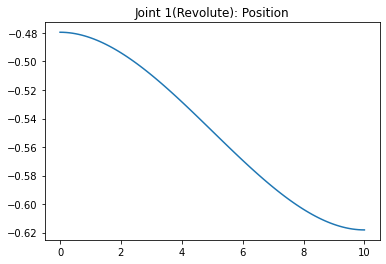

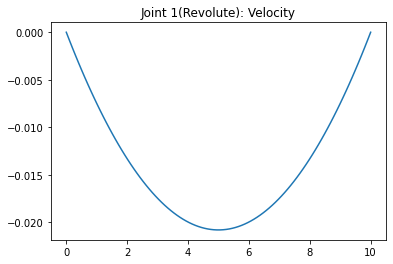

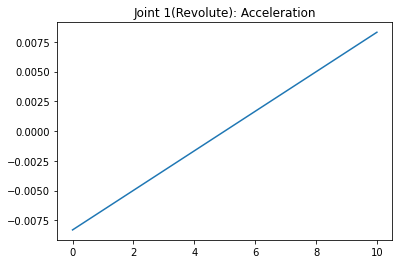

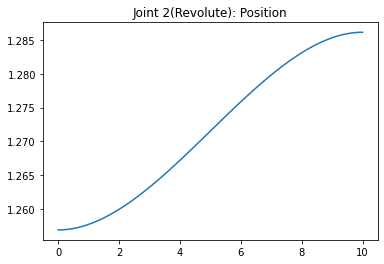

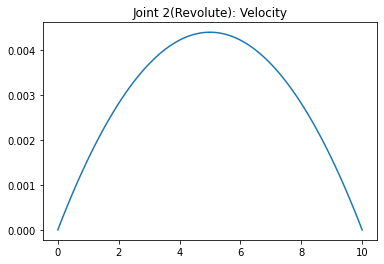

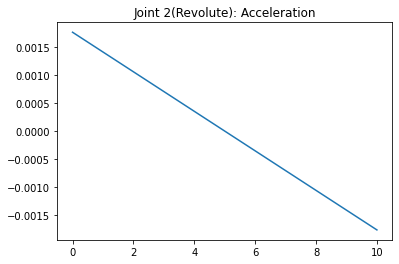

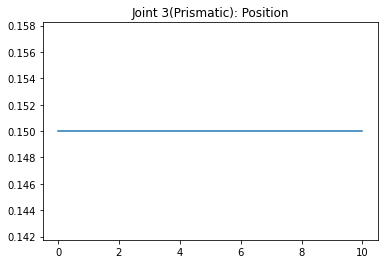

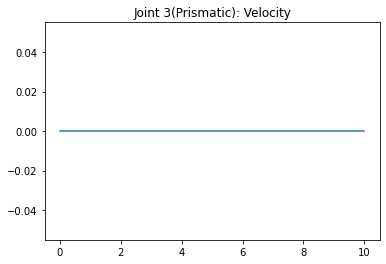

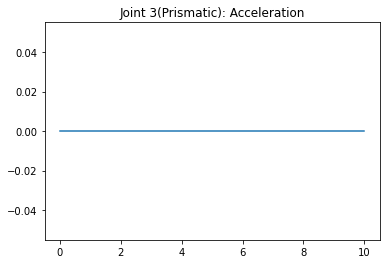

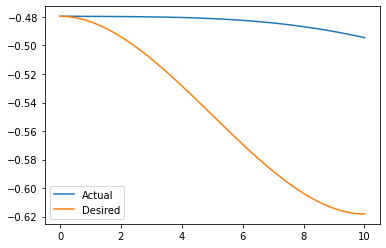

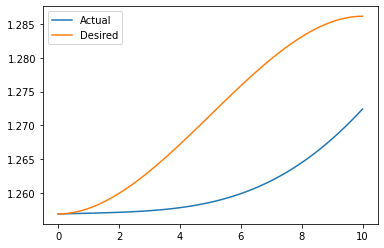

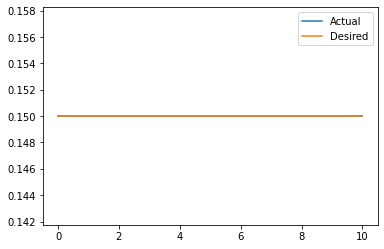

NameError: ignored

In [4]:
# Importing Libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks,time):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks
    self.time = time

  # Function to calculate the angles of the initial and the final positions of the robot.
  def inverse_kinematics(self, endeffector_position):
    r = (endeffector_position[0]**2 + endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(endeffector_position[1],endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.lengthsoflinks[2] - endeffector_position[2]

    return (theta1, theta2, d3)
  
  def cubic(self, x0, xf, x0dot, xfdot, t0, tf): # gives cubic polynomial coeff for single joint
    T = np.array([[1, t0, t0**2, t0**3],[0, 1, 2 * t0, 3 * t0**2],[1, tf, tf**2, tf**3],[0, 1, 2 * tf, 3 * tf**2]])
    x = np.array([[x0],[x0dot],[xf],[xfdot]])
    a = np.matmul(np.linalg.inv(T),x)
    return a

  def plot_trajectory(self):
    # Calculating q_desired for initial and final position
    q0 = self.inverse_kinematics(self.initial_position)
    q1 = self.inverse_kinematics(self.final_position)
    q1_poly = self.cubic(q0[0], q1[0], 0, 0, 0, self.time)
    q2_poly = self.cubic(q0[1], q1[1], 0, 0, 0, self.time)
    q3_poly = self.cubic(q0[2], q1[2], 0, 0, 0, self.time)

    t = np.linspace(0, self.time, 100)

    # Plot for Joint 1
    self.joint1_desired_position = q1_poly[0] + q1_poly[1] * t + q1_poly[2] * t**2 + q1_poly[3] * t**3
    self.joint1_desired_velocity = q1_poly[1] + 2 * q1_poly[2] * t + 3 * q1_poly[3] * t**2
    self.joint1_desired_acceleration = 2 * q1_poly[2] + 6 * q1_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint1_desired_position)
    plt.title("Joint 1(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint1_desired_velocity)
    plt.title("Joint 1(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint1_desired_acceleration)
    plt.title("Joint 1(Revolute): Acceleration")

    # Plot for Joint 2
    self.joint2_desired_position = q2_poly[0] + q2_poly[1] * t + q2_poly[2] * t**2 + q2_poly[3] * t**3
    self.joint2_desired_velocity = q2_poly[1] + 2 * q2_poly[2] * t + 3 * q2_poly[3] * t**2
    self.joint2_desired_acceleration = 2 * q2_poly[2] + 6 * q2_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint2_desired_position)
    plt.title("Joint 2(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint2_desired_velocity)
    plt.title("Joint 2(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint2_desired_acceleration)
    plt.title("Joint 2(Revolute): Acceleration")
    

    # Plot for Joint 3
    self.joint3_desired_position = q3_poly[0] + q3_poly[1] * t + q3_poly[2] * t**2 + q3_poly[3] * t**3
    self.joint3_desired_velocity = q3_poly[1] + 2 * q3_poly[2] * t + 3 * q3_poly[3] * t**2
    self.joint3_desired_acceleration = 2 * q3_poly[2] + 6 * q3_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint3_desired_position)
    plt.title("Joint 3(Prismatic): Position")
    plt.figure()
    plt.plot(t, self.joint3_desired_velocity)
    plt.title("Joint 3(Prismatic): Velocity")
    plt.figure()
    plt.plot(t, self.joint3_desired_acceleration)
    plt.title("Joint 3(Prismatic): Acceleration")
    plt.show()
    
  def joint_velocities(self, xdot, ydot, zdot):
    Xdot = np.array([[xdot],[ydot],[zdot]])
    qdot = np.linalg.pinv(self.J_v) @ Xdot
    return qdot

  def forward_kinematics(self, theta1, theta2, d3):
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T

    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print(np.shape(self.J_v))
    return (self.On[-1][1])

    
  # PI control
  def Control_Tuning(self):
    # Defining Set points 
    [self.q1, self.q2, self.q3] = self.inverse_kinematics(self.initial_position)
    [self.q1d, self.q2d, self.q3d] = self.inverse_kinematics(self.final_position)

    # Constants to tune PD control
    self.Kp1 = 0.8
    self.Kp2 = 0.2
    self.Kp3 = 10
    self.Kd1 = 0.3
    self.Kd2 = 0.2
    self.Kd3 = 0.3


    # Proportional control
    self.tau1 = self.Kp1 * (self.q1d - self.q1)
    self.tau2 = self.Kp2 * (self.q2d - self.q2)
    self.tau3 = self.Kp3 * (self.q3d - self.q3) + 9.81 # Compensating for gravity
    
  def function(self,t,y):
    q1 = y[0]
    q2 = y[1]
    q3 = y[2]
    q1dot = y[3]
    q2dot = y[4]
    q3dot = y[5]
    l = [self.lengthsoflinks[0],self.lengthsoflinks[1]]
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.81
    I1 = I2 = I3 = 1
    I4 = 0
    m = [1,1,1,0] # masses of links
    alpha = I1 + r[0]**2 * m[0] + l[0]**2 *  (m[1] + m[2] + m[3])
    beta = I2 + I3 + I4 + l[1]**2 * m[2] + l[1]**2 * m[3] + m[1] * r[1]**2
    gamma = l[0] * l[1] * (m[2] + m[3]) + l[0] * m[1] * r[1] 
    delta = I3 + I4
    # M matrix values
    M = np.array([[alpha + beta + 2 * gamma * np.cos(q2), beta + gamma * np.cos(q2), 0],[beta + gamma * np.cos(q2),beta ,0],[0,0,m[2]]])
    # C matrix values
    C = np.array([[-gamma * np.sin(q2) * q2dot,-gamma * np.sin(q2) * (q1dot + q2dot),0],[gamma * np.sin(q2) * q1dot,0,0],[0,0,0]])
    # G matrix 
    g = np.array([[0],[0],[m[2] * g]])

    torque = np.array([[self.tau1],[self.tau2],[self.tau3]])
    qdot = np.array([[q1dot],[q2dot],[q3dot]])
    qddot = np.linalg.inv(M)@(torque - C@qdot - g)
    dydt = np.vstack((qdot, qddot))

    return dydt
    
  def PD_Control(self):
    ode = scipy.integrate.ode(self.function).set_integrator('vode', nsteps=500, method='bdf')
    # t = self.time # Total time
    dt = 0.01 # Length of timestep
    state = [self.q1, self.q2, self.q3, 0, 0, 0]
    error_buffer_q1 = [self.q1d - self.q1] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q2 = [self.q2d - self.q2] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q3 = [self.q3d - self.q3] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 

    q1t = [self.q1]
    q2t = [self.q2]
    q3t = [self.q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]
    
    t = np.linspace(0, self.time, 100)
    
    for i in range(1, len(t)):
      time = t[i]
      ode.set_initial_value(state,time)
      newstate = ode.integrate(ode.t+dt)
      state = newstate

      if i==1:
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i] - state[0])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i] - state[1])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i] - state[2]) + 9.81

      if i>1 and i<len(t):
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i-1] - q1t[i-1]) + self.Kd1 * (self.joint1_desired_position[i-1] - q1t[i-1] - self.joint1_desired_position[i-2] + q1t[i-2])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i-1] - q2t[i-1]) + self.Kd2 * (self.joint2_desired_position[i-1] - q2t[i-1] - self.joint2_desired_position[i-2] + q2t[i-2])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i-1] - q3t[i-1]) + self.Kd3 * (self.joint3_desired_position[i-1] - q3t[i-1] - self.joint3_desired_position[i-2] + q3t[i-2]) + 9.81

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])
    
    plt.figure()
    plt.plot(t, q1t)
    plt.plot(t, self.joint1_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q2t)
    plt.plot(t, self.joint2_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q3t)
    plt.plot(t, self.joint3_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()

  def ff(self):

    A = np.array([[1,t0,t0**2,t0**3],[0,1,2*t0,3*t0**2],[1,tf,tf**2,tf**3],[0,1,2*tf,3*tf**2]])
    q1_mat = np.array([[q10,0,q1f,0]])
    B1 = np.linalg.inv(A)@np.transpose(q1_mat)
    a01 = B1[0]
    a11 = B1[1]
    a21 = B1[2]
    a31 = B1[3]

    q2_mat = np.array([[q20,0,q2f,0]])
    B2 = np.linalg.inv(A)@np.transpose(q2_mat)
    a02 = B2[0]
    a12 = B2[1]
    a22 = B2[2]
    a32 = B2[3]

    q3_mat = np.array([[q30,0,q3f,0]])
    B3 = np.linalg.inv(A)@np.transpose(q3_mat)
    a03 = B3[0]
    a13 = B3[1]
    a23 = B3[2]
    a33 = B3[3]

    t = np.linspace(t0,tf,1000)

    theta1_trajectory = []
    theta2_trajectory = []
    d3_trajectory = []
    theta1dot_trajectory = []
    theta2dot_trajectory = []
    d3dot_trajectory = []
    theta1ddot_trajectory = []
    theta2ddot_trajectory = []
    d3ddot_trajectory = []

    for j in range(0,len(t)):

      theta1 = a01 + a11*t[j] + a21*t[j]**2 + a31*t[j]**3
      theta2 = a02 + a12*t[j] + a22*t[j]**2 + a32*t[j]**3
      d3 = a03 + a13*t[j] + a23*t[j]**2 + a33*t[j]**3

      theta1dot = a11 + 2*a21*t[j] + 3*a31*t[j]**2
      theta2dot = a12 + 2*a22*t[j] + 3*a32*t[j]**2
      d3dot = a13 + 2*a23*t[j] + 3*a33*t[j]**2

      theta1ddot = 2*a21 + 6*a31*t[j]
      theta2ddot = 2*a22 + 6*a32*t[j]
      d3ddot = 2*a23 + 6*a33*t[j]

      theta1_trajectory.append(theta1)
      theta2_trajectory.append(theta2)
      d3_trajectory.append(d3)

      theta1dot_trajectory.append(theta1dot)
      theta2dot_trajectory.append(theta2dot)
      d3dot_trajectory.append(d3dot)

      theta1ddot_trajectory.append(theta1ddot)
      theta2ddot_trajectory.append(theta2ddot)
      d3ddot_trajectory.append(d3ddot)

    y_trajectory = []
    ydot_trajectory = []

    for k in range(0,len(t)):
      (x,y,z) = self.get_end_eff_posn()
      y_trajectory.append(y)
      Jv =  scara.getJv()
      qdot = np.array([[theta1],[theta2],[d3]])
      Xdot = Jv@qdot
      ydot = Xdot[1]
      ydot_trajectory.append(ydot)

  def get_end_eff_posn(self):
    return self.end_effector_posn

  def feed_forward_control(self):
    ode = scipy.integrate.ode(func).set_integrator('vode', nsteps=500, method='bdf')

    state = [q1,q2,q3,0,0,0]
    dt = 0.01

    q1t = [q1]
    q2t = [q2]
    q3t = [q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]

    Jm1 = 4*10**(-5)
    Jm2 = 4*10**(-5)
    Jm3 = 4*10**(-5)
    Bm1 = 4*10**(-5)
    Bm2 = 4*10**(-5)
    Bm3 = 4*10**(-5)
    r1 = 5
    r2 = 5
    r3 = 5
    Kb1 = 0.02
    Kb2 = 0.02
    Kb3 = 0.02
    Km1 = 0.02
    Km2 = 0.02
    Km3 = 0.02
    R1 = 0.3
    R2 = 0.3
    R3 = 0.3
    Beff1 = Bm1 + Kb1*Km1/R1
    Beff2 = Bm2 + Kb2*Km2/R2
    Beff3 = Bm3 + Kb3*Km3/R3

    for i in range(1,len(t)):
      time = t[i]
      ode.set_initial_value(state,time)
      newstate = ode.integrate(ode.t+dt)
      state = newstate

      (d11,d22,d33) = get_diag_D(state[1])

      Jeff1 = Jm1 + r1**2*d11
      Jeff2 = Jm2 + r2**2*d22
      Jeff3 = Jm3 + r3**2*d33

      if i==1:
        tau1 = Kp1*(theta1_trajectory[i-1]-q1t[i-1]) + Jeff1*theta1ddot_trajectory[i-1]/(100*r1) + Beff1*theta1dot_trajectory[i-1]/(100*r1)
        tau1 = tau1[0]
        tau2 = Kp2*(theta2_trajectory[i-1]-q2t[i-1]) + Jeff2*theta2ddot_trajectory[i-1]/(100*r2) + Beff2*theta2dot_trajectory[i-1]/(100*r2)
        tau2 = tau2[0]
        tau3 = 9.8 + Kp3*(d3_trajectory[i-1]-q3t[i-1]) + Jeff3*d3ddot_trajectory[i-1]/(100*r3) + Beff3*d3dot_trajectory[i-1]/(100*r3)
        tau3 = tau3[0]

        print(tau1,tau2,tau3)

      if i>1 and i<len(t):
        tau1 = Kp1*(theta1_trajectory[i-1]-q1t[i-1])+Kd1*(theta1_trajectory[i-1]-q1t[i-1]-theta1_trajectory[i-2]+q1t[i-2])+ Jeff1*theta1ddot_trajectory[i-1]/(100*r1) + Beff1*theta1dot_trajectory[i-1]/(100*r1)
        tau2 = Kp2*(theta2_trajectory[i-1]-q2t[i-1])+Kd2*(theta2_trajectory[i-1]-q2t[i-1]-theta2_trajectory[i-2]+q2t[i-2])+ Jeff2*theta2ddot_trajectory[i-1]/(100*r2) + Beff2*theta2dot_trajectory[i-1]/(100*r2)
        tau3 = 9.8 + Kp3*(d3_trajectory[i-1]-q3t[i-1])+Kd3*(d3_trajectory[i-1]-q3t[i-1]-d3_trajectory[i-2]+q3t[i-2])+ Jeff3*d3ddot_trajectory[i-1]/(100*r3) + Beff3*d3dot_trajectory[i-1]/(100*r3)

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])

    print(state)

    plt.figure()
    plt.plot(t, q1t)
    plt.plot(t,theta1_trajectory)
    plt.show()
    plt.figure()
    plt.plot(t, q2t)
    plt.plot(t,theta2_trajectory)
    plt.show()
    plt.figure()
    plt.plot(t, q3t)
    plt.plot(t,d3_trajectory)
    plt.show()

    xt = []
    yt = []
    zt = []

    for i in range(0,len(q1t)):
      scara = manipulator(3, "RRP", [[q1t[i],0.25,0.25,0],[q2t[i],0,0.25,np.pi],[0,q3t[i],0,0]])
      (x,y,z) = scara.get_end_eff_posn()
      xt.append(x)
      yt.append(y)
      zt.append(z)

    plt.figure()
    plt.plot(t, y_trajectory)
    plt.plot(t, yt)
    plt.show()
    plt.plot(t, 0.4*np.ones(len(t)))
    plt.plot(t, xt)
    plt.show()

    plt.figure()
    plt.plot(0.4*np.ones(len(t), y_trajectory))
    plt.plot(xt,yt)
    plt.show()


  def compensate(self):
    ode = scipy.integrate.ode(func).set_integrator('vode', nsteps=500, method='bdf')
    state = [q1,q2,q3,0,0,0]
    dt = 0.01

    q1t = [q1]
    q2t = [q2]
    q3t = [q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]

    Jm1 = 4*10**(-5)
    Jm2 = 4*10**(-5)
    Jm3 = 4*10**(-5)
    Bm1 = 4*10**(-5)
    Bm2 = 4*10**(-5)
    Bm3 = 4*10**(-5)
    r1 = 5
    r2 = 5
    r3 = 5
    Kb1 = 0.02
    Kb2 = 0.02
    Kb3 = 0.02
    Km1 = 0.02
    Km2 = 0.02
    Km3 = 0.02
    R1 = 0.3
    R2 = 0.3
    R3 = 0.3
    Beff1 = Bm1 + Kb1*Km1/R1
    Beff2 = Bm2 + Kb2*Km2/R2
    Beff3 = Bm3 + Kb3*Km3/R3

    Jeff1 = Jm1
    Jeff2 = Jm2
    Jeff3 = Jm3

    for i in range(1,len(t)):
      time = t[i]
      ode.set_initial_value(state,time)
      newstate = ode.integrate(ode.t+dt)
      state = newstate

      (M,C,G) = get_dynamic_matrices(theta2_trajectory[i-1],theta1dot_trajectory[i-1],theta2dot_trajectory[i-1])
      qddot_desired = np.array([[theta1ddot_trajectory[i-1]],[theta2ddot_trajectory[i-1]],[d3ddot_trajectory[i-1]]])
      qddot_desired = np.reshape(qddot_desired,(3,1))
      qdot_desired = np.array([[theta1dot_trajectory[i-1]],[theta2dot_trajectory[i-1]],[d3dot_trajectory[i-1]]])
      qdot_desired = np.reshape(qdot_desired,(3,1))
      computed_torque = (M@qddot_desired)/r1+C@qdot_desired/r1**2+G

      if i==1:
        tau1 = Kp1*(theta1_trajectory[i-1]-q1t[i-1]) + Jeff1*theta1ddot_trajectory[i-1]/100 + Beff1*theta1dot_trajectory[i-1]/100 + computed_torque[0]
        tau1 = tau1[0]
        tau2 = Kp2*(theta2_trajectory[i-1]-q2t[i-1]) + Jeff2*theta2ddot_trajectory[i-1]/100 + Beff2*theta2dot_trajectory[i-1]/100 + computed_torque[1]
        tau2 = tau2[0]
        tau3 = Kp3*(d3_trajectory[i-1]-q3t[i-1]) + Jeff3*d3ddot_trajectory[i-1]/100 + Beff3*d3dot_trajectory[i-1]/100 + computed_torque[2]
        tau3 = tau3[0]

        print(tau1,tau2,tau3)

      if i>1 and i<len(t):
        tau1 = Kp1*(theta1_trajectory[i-1]-q1t[i-1])+Kd1*(theta1_trajectory[i-1]-q1t[i-1]-theta1_trajectory[i-2]+q1t[i-2])+ Jeff1*theta1ddot_trajectory[i-1]/100 + Beff1*theta1dot_trajectory[i-1]/100 + computed_torque[0]
        tau2 = Kp2*(theta2_trajectory[i-1]-q2t[i-1])+Kd2*(theta2_trajectory[i-1]-q2t[i-1]-theta2_trajectory[i-2]+q2t[i-2])+ Jeff2*theta2ddot_trajectory[i-1]/100 + Beff2*theta2dot_trajectory[i-1]/100 + computed_torque[1]
        tau3 = Kp3*(d3_trajectory[i-1]-q3t[i-1])+Kd3*(d3_trajectory[i-1]-q3t[i-1]-d3_trajectory[i-2]+q3t[i-2])+ Jeff3*d3ddot_trajectory[i-1]/100 + Beff3*d3dot_trajectory[i-1]/100 + computed_torque[2]

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])

    print(state)

    plt.figure()
    plt.plot(t, q1t)
    plt.plot(t,theta1_trajectory)
    plt.show()
    plt.figure()
    plt.plot(t, q2t)
    plt.plot(t,theta2_trajectory)
    plt.show()
    plt.figure()
    plt.plot(t, q3t)
    plt.plot(t,d3_trajectory)
    plt.show()

    xt = []
    yt = []
    zt = []

    for i in range(0,len(q1t)):
      scara = manipulator(3, "RRP", [[q1t[i],0.25,0.25,0],[q2t[i],0,0.25,np.pi],[0,q3t[i],0,0]])
      (x,y,z) = scara.get_end_eff_posn()
      xt.append(x)
      yt.append(y)
      zt.append(z)

    plt.figure()
    plt.plot(t, y_trajectory)
    plt.plot(t, yt)
    plt.show()
    plt.plot(t, 0.4*np.ones(len(t)))
    plt.plot(t, xt)
    plt.show()

    plt.figure()
    plt.plot(0.4*np.ones(len(t)), y_trajectory)
    plt.plot(xt,yt)
    plt.show()

# DRIVER CODE: Initializing the conditions
A = [0.4,0.06,0.1] # Initial Position
B = [0.4,0.01,0.1] # Final Position
C = [0.25,0.25,0.25] #lengths of links 

SCARA = Robot(A,B,C,10)
SCARA.plot_trajectory()
SCARA.Control_Tuning()
SCARA.PD_Control()
SCARA.ff()
SCARA.feed_forward_control()
SCARA.compensate()

Q5: Random Disturbance

In [ ]:
# Importing Libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks,time):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks
    self.time = time

  # Function to calculate the angles of the initial and the final positions of the robot.
  def inverse_kinematics(self, endeffector_position):
    r = (endeffector_position[0]**2 + endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(endeffector_position[1],endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.lengthsoflinks[2] - endeffector_position[2]

    return (theta1, theta2, d3)
  
  def cubic(self, x0, xf, x0dot, xfdot, t0, tf): # gives cubic polynomial coeff for single joint
    T = np.array([[1, t0, t0**2, t0**3],[0, 1, 2 * t0, 3 * t0**2],[1, tf, tf**2, tf**3],[0, 1, 2 * tf, 3 * tf**2]])
    x = np.array([[x0],[x0dot],[xf],[xfdot]])
    a = np.matmul(np.linalg.inv(T),x)
    return a

  def plot_trajectory(self):
    # Calculating q_desired for initial and final position
    q0 = self.inverse_kinematics(self.initial_position)
    q1 = self.inverse_kinematics(self.final_position)
    q1_poly = self.cubic(q0[0], q1[0], 0, 0, 0, self.time)
    q2_poly = self.cubic(q0[1], q1[1], 0, 0, 0, self.time)
    q3_poly = self.cubic(q0[2], q1[2], 0, 0, 0, self.time)

    t = np.linspace(0, self.time, 100)

    # Plot for Joint 1
    self.joint1_desired_position = q1_poly[0] + q1_poly[1] * t + q1_poly[2] * t**2 + q1_poly[3] * t**3
    self.joint1_desired_velocity = q1_poly[1] + 2 * q1_poly[2] * t + 3 * q1_poly[3] * t**2
    self.joint1_desired_acceleration = 2 * q1_poly[2] + 6 * q1_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint1_desired_position)
    plt.title("Joint 1(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint1_desired_velocity)
    plt.title("Joint 1(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint1_desired_acceleration)
    plt.title("Joint 1(Revolute): Acceleration")

    # Plot for Joint 2
    self.joint2_desired_position = q2_poly[0] + q2_poly[1] * t + q2_poly[2] * t**2 + q2_poly[3] * t**3
    self.joint2_desired_velocity = q2_poly[1] + 2 * q2_poly[2] * t + 3 * q2_poly[3] * t**2
    self.joint2_desired_acceleration = 2 * q2_poly[2] + 6 * q2_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint2_desired_position)
    plt.title("Joint 2(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint2_desired_velocity)
    plt.title("Joint 2(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint2_desired_acceleration)
    plt.title("Joint 2(Revolute): Acceleration")
    

    # Plot for Joint 3
    self.joint3_desired_position = q3_poly[0] + q3_poly[1] * t + q3_poly[2] * t**2 + q3_poly[3] * t**3
    self.joint3_desired_velocity = q3_poly[1] + 2 * q3_poly[2] * t + 3 * q3_poly[3] * t**2
    self.joint3_desired_acceleration = 2 * q3_poly[2] + 6 * q3_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint3_desired_position)
    plt.title("Joint 3(Prismatic): Position")
    plt.figure()
    plt.plot(t, self.joint3_desired_velocity)
    plt.title("Joint 3(Prismatic): Velocity")
    plt.figure()
    plt.plot(t, self.joint3_desired_acceleration)
    plt.title("Joint 3(Prismatic): Acceleration")
    plt.show()
    
  def joint_velocities(self, xdot, ydot, zdot):
    Xdot = np.array([[xdot],[ydot],[zdot]])
    qdot = np.linalg.pinv(self.J_v) @ Xdot
    return qdot

  def forward_kinematics(self, theta1, theta2, d3):
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T

    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print(np.shape(self.J_v))
    return (self.On[-1][1])
    
  # PI control
  def Control_Tuning(self):
    # Defining Set points 
    [self.q1, self.q2, self.q3] = self.inverse_kinematics(self.initial_position)
    [self.q1d, self.q2d, self.q3d] = self.inverse_kinematics(self.final_position)

    # Constants to tune PD control
    self.Kp1 = 0.8
    self.Kp2 = 0.2
    self.Kp3 = 10
    self.Kd1 = 0.3
    self.Kd2 = 0.2
    self.Kd3 = 0.3


    # Proportional control
    self.tau1 = self.Kp1 * (self.q1d - self.q1)
    self.tau2 = self.Kp2 * (self.q2d - self.q2)
    self.tau3 = self.Kp3 * (self.q3d - self.q3) + 9.81 # Compensating for gravity
    
  def function(self,t,y):
    q1 = y[0]
    q2 = y[1]
    q3 = y[2]
    q1dot = y[3]
    q2dot = y[4]
    q3dot = y[5]
    l = [self.lengthsoflinks[0],self.lengthsoflinks[1]]
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.81
    I1 = I2 = I3 = 1
    I4 = 0
    m = [1,1,1,0] # masses of links
    alpha = I1 + r[0]**2 * m[0] + l[0]**2 *  (m[1] + m[2] + m[3])
    beta = I2 + I3 + I4 + l[1]**2 * m[2] + l[1]**2 * m[3] + m[1] * r[1]**2
    gamma = l[0] * l[1] * (m[2] + m[3]) + l[0] * m[1] * r[1] 
    delta = I3 + I4
    # M matrix values
    M = np.array([[alpha + beta + 2 * gamma * np.cos(q2), beta + gamma * np.cos(q2), 0],[beta + gamma * np.cos(q2),beta ,0],[0,0,m[2]]])
    # C matrix values
    C = np.array([[-gamma * np.sin(q2) * q2dot,-gamma * np.sin(q2) * (q1dot + q2dot),0],[gamma * np.sin(q2) * q1dot,0,0],[0,0,0]])
    # G matrix 
    g = np.array([[0],[0],[m[2] * g]])

    torque = np.array([[self.tau1],[self.tau2],[self.tau3]])
    qdot = np.array([[q1dot],[q2dot],[q3dot]])
    qddot = np.linalg.inv(M)@(torque - C@qdot - g)
    dydt = np.vstack((qdot, qddot))

    return dydt
    
  def PD_Control(self):
    ode = scipy.integrate.ode(self.function).set_integrator('vode', nsteps=500, method='bdf')
    # t = self.time # Total time
    dt = 0.01 # Length of timestep
    state = [self.q1, self.q2, self.q3, 0, 0, 0]
    error_buffer_q1 = [self.q1d - self.q1] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q2 = [self.q2d - self.q2] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q3 = [self.q3d - self.q3] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 

    q1t = [self.q1]
    q2t = [self.q2]
    q3t = [self.q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]
    
    t = np.linspace(0, self.time, 100)
    
    for i in range(1, len(t)):
      time = t[i]
      ode.set_initial_value(state,time)
      newstate = ode.integrate(ode.t+dt)
      state = newstate

      if i==1:
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i] - state[0])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i] - state[1])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i] - state[2]) + 9.81

      if i>1 and i<len(t):
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i-1] - q1t[i-1]) + self.Kd1 * (self.joint1_desired_position[i-1] - q1t[i-1] - self.joint1_desired_position[i-2] + q1t[i-2])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i-1] - q2t[i-1]) + self.Kd2 * (self.joint2_desired_position[i-1] - q2t[i-1] - self.joint2_desired_position[i-2] + q2t[i-2])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i-1] - q3t[i-1]) + self.Kd3 * (self.joint3_desired_position[i-1] - q3t[i-1] - self.joint3_desired_position[i-2] + q3t[i-2]) + 9.81

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])
    
    plt.figure()
    plt.plot(t, q1t)
    plt.plot(t, self.joint1_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q2t)
    plt.plot(t, self.joint2_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q3t)
    plt.plot(t, self.joint3_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()

# DRIVER CODE: Initializing the conditions
A = [0.4,0.06,0.1] # Initial Position
B = [0.4,0.01,0.1] # Final Position
C = [0.25,0.25,0.25] #lengths of links 

SCARA = Robot(A,B,C,10)
SCARA.plot_trajectory()
SCARA.Control_Tuning()
SCARA.PD_Control()

Q6: Impulsive Disturbance

In [ ]:
# Importing Libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks,time):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks
    self.time = time

  # Function to calculate the angles of the initial and the final positions of the robot.
  def inverse_kinematics(self, endeffector_position):
    r = (endeffector_position[0]**2 + endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(endeffector_position[1],endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.lengthsoflinks[2] - endeffector_position[2]

    return (theta1, theta2, d3)
  
  def cubic(self, x0, xf, x0dot, xfdot, t0, tf): # gives cubic polynomial coeff for single joint
    T = np.array([[1, t0, t0**2, t0**3],[0, 1, 2 * t0, 3 * t0**2],[1, tf, tf**2, tf**3],[0, 1, 2 * tf, 3 * tf**2]])
    x = np.array([[x0],[x0dot],[xf],[xfdot]])
    a = np.matmul(np.linalg.inv(T),x)
    return a

  def plot_trajectory(self):
    # Calculating q_desired for initial and final position
    q0 = self.inverse_kinematics(self.initial_position)
    q1 = self.inverse_kinematics(self.final_position)
    q1_poly = self.cubic(q0[0], q1[0], 0, 0, 0, self.time)
    q2_poly = self.cubic(q0[1], q1[1], 0, 0, 0, self.time)
    q3_poly = self.cubic(q0[2], q1[2], 0, 0, 0, self.time)

    t = np.linspace(0, self.time, 100)

    # Plot for Joint 1
    self.joint1_desired_position = q1_poly[0] + q1_poly[1] * t + q1_poly[2] * t**2 + q1_poly[3] * t**3
    self.joint1_desired_velocity = q1_poly[1] + 2 * q1_poly[2] * t + 3 * q1_poly[3] * t**2
    self.joint1_desired_acceleration = 2 * q1_poly[2] + 6 * q1_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint1_desired_position)
    plt.title("Joint 1(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint1_desired_velocity)
    plt.title("Joint 1(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint1_desired_acceleration)
    plt.title("Joint 1(Revolute): Acceleration")

    # Plot for Joint 2
    self.joint2_desired_position = q2_poly[0] + q2_poly[1] * t + q2_poly[2] * t**2 + q2_poly[3] * t**3
    self.joint2_desired_velocity = q2_poly[1] + 2 * q2_poly[2] * t + 3 * q2_poly[3] * t**2
    self.joint2_desired_acceleration = 2 * q2_poly[2] + 6 * q2_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint2_desired_position)
    plt.title("Joint 2(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint2_desired_velocity)
    plt.title("Joint 2(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint2_desired_acceleration)
    plt.title("Joint 2(Revolute): Acceleration")
    

    # Plot for Joint 3
    self.joint3_desired_position = q3_poly[0] + q3_poly[1] * t + q3_poly[2] * t**2 + q3_poly[3] * t**3
    self.joint3_desired_velocity = q3_poly[1] + 2 * q3_poly[2] * t + 3 * q3_poly[3] * t**2
    self.joint3_desired_acceleration = 2 * q3_poly[2] + 6 * q3_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint3_desired_position)
    plt.title("Joint 3(Prismatic): Position")
    plt.figure()
    plt.plot(t, self.joint3_desired_velocity)
    plt.title("Joint 3(Prismatic): Velocity")
    plt.figure()
    plt.plot(t, self.joint3_desired_acceleration)
    plt.title("Joint 3(Prismatic): Acceleration")
    plt.show()
    
  def joint_velocities(self, xdot, ydot, zdot):
    Xdot = np.array([[xdot],[ydot],[zdot]])
    qdot = np.linalg.pinv(self.J_v) @ Xdot
    return qdot

  def forward_kinematics(self, theta1, theta2, d3):
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T

    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print(np.shape(self.J_v))
    return (self.On[-1][1])

    
  # PI control
  def Control_Tuning(self):
    # Defining Set points 
    [self.q1, self.q2, self.q3] = self.inverse_kinematics(self.initial_position)
    [self.q1d, self.q2d, self.q3d] = self.inverse_kinematics(self.final_position)

    # Constants to tune PD control
    self.Kp1 = 0.8
    self.Kp2 = 0.2
    self.Kp3 = 10
    self.Kd1 = 0.3
    self.Kd2 = 0.2
    self.Kd3 = 0.3


    # Proportional control
    self.tau1 = self.Kp1 * (self.q1d - self.q1)
    self.tau2 = self.Kp2 * (self.q2d - self.q2)
    self.tau3 = self.Kp3 * (self.q3d - self.q3) + 9.81 # Compensating for gravity
    
  def function(self,t,y):
    q1 = y[0]
    q2 = y[1]
    q3 = y[2]
    q1dot = y[3]
    q2dot = y[4]
    q3dot = y[5]
    l = [self.lengthsoflinks[0],self.lengthsoflinks[1]]
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.81
    I1 = I2 = I3 = 1
    I4 = 0
    m = [1,1,1,0] # masses of links
    alpha = I1 + r[0]**2 * m[0] + l[0]**2 *  (m[1] + m[2] + m[3])
    beta = I2 + I3 + I4 + l[1]**2 * m[2] + l[1]**2 * m[3] + m[1] * r[1]**2
    gamma = l[0] * l[1] * (m[2] + m[3]) + l[0] * m[1] * r[1] 
    delta = I3 + I4
    # M matrix values
    M = np.array([[alpha + beta + 2 * gamma * np.cos(q2), beta + gamma * np.cos(q2), 0],[beta + gamma * np.cos(q2),beta ,0],[0,0,m[2]]])
    # C matrix values
    C = np.array([[-gamma * np.sin(q2) * q2dot,-gamma * np.sin(q2) * (q1dot + q2dot),0],[gamma * np.sin(q2) * q1dot,0,0],[0,0,0]])
    # G matrix 
    g = np.array([[0],[0],[m[2] * g]])

    torque = np.array([[self.tau1],[self.tau2],[self.tau3]])
    qdot = np.array([[q1dot],[q2dot],[q3dot]])
    qddot = np.linalg.inv(M)@(torque - C@qdot - g)
    dydt = np.vstack((qdot, qddot))

    return dydt
    
  def PD_Control(self):
    ode = scipy.integrate.ode(self.function).set_integrator('vode', nsteps=500, method='bdf')
    # t = self.time # Total time
    dt = 0.01 # Length of timestep
    state = [self.q1, self.q2, self.q3, 0, 0, 0]
    error_buffer_q1 = [self.q1d - self.q1] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q2 = [self.q2d - self.q2] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q3 = [self.q3d - self.q3] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 

    q1t = [self.q1]
    q2t = [self.q2]
    q3t = [self.q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]
    
    t = np.linspace(0, self.time, 100)
    
    for i in range(1, len(t)):
      time = t[i]
      ode.set_initial_value(state,time)
      newstate = ode.integrate(ode.t+dt)
      state = newstate

      if i==1:
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i] - state[0])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i] - state[1])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i] - state[2]) + 9.81

      if i>1 and i<len(t):
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i-1] - q1t[i-1]) + self.Kd1 * (self.joint1_desired_position[i-1] - q1t[i-1] - self.joint1_desired_position[i-2] + q1t[i-2])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i-1] - q2t[i-1]) + self.Kd2 * (self.joint2_desired_position[i-1] - q2t[i-1] - self.joint2_desired_position[i-2] + q2t[i-2])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i-1] - q3t[i-1]) + self.Kd3 * (self.joint3_desired_position[i-1] - q3t[i-1] - self.joint3_desired_position[i-2] + q3t[i-2]) + 9.81

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])
    
    plt.figure()
    plt.plot(t, q1t)
    plt.plot(t, self.joint1_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q2t)
    plt.plot(t, self.joint2_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q3t)
    plt.plot(t, self.joint3_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()

# DRIVER CODE: Initializing the conditions
A = [0.4,0.06,0.1] # Initial Position
B = [0.4,0.01,0.1] # Final Position
C = [0.25,0.25,0.25] #lengths of links 

SCARA = Robot(A,B,C,10)
SCARA.plot_trajectory()
SCARA.Control_Tuning()
SCARA.PD_Control()

MASTER ROBOT CLASS WITH ALL FUNCTIONS

In [ ]:
# Importing Libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks,time):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks
    self.time = time

  # Function to calculate the angles of the initial and the final positions of the robot.
  def inverse_kinematics(self, endeffector_position):
    r = (endeffector_position[0]**2 + endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(endeffector_position[1],endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.lengthsoflinks[2] - endeffector_position[2]

    return (theta1, theta2, d3)
  
  def cubic(self, x0, xf, x0dot, xfdot, t0, tf): # gives cubic polynomial coeff for single joint
    T = np.array([[1, t0, t0**2, t0**3],[0, 1, 2 * t0, 3 * t0**2],[1, tf, tf**2, tf**3],[0, 1, 2 * tf, 3 * tf**2]])
    x = np.array([[x0],[x0dot],[xf],[xfdot]])
    a = np.matmul(np.linalg.inv(T),x)
    return a

  def plot_trajectory(self):
    # Calculating q_desired for initial and final position
    q0 = self.inverse_kinematics(self.initial_position)
    q1 = self.inverse_kinematics(self.final_position)
    q1_poly = self.cubic(q0[0], q1[0], 0, 0, 0, self.time)
    q2_poly = self.cubic(q0[1], q1[1], 0, 0, 0, self.time)
    q3_poly = self.cubic(q0[2], q1[2], 0, 0, 0, self.time)

    t = np.linspace(0, self.time, 100)

    # Plot for Joint 1
    self.joint1_desired_position = q1_poly[0] + q1_poly[1] * t + q1_poly[2] * t**2 + q1_poly[3] * t**3
    self.joint1_desired_velocity = q1_poly[1] + 2 * q1_poly[2] * t + 3 * q1_poly[3] * t**2
    self.joint1_desired_acceleration = 2 * q1_poly[2] + 6 * q1_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint1_desired_position)
    plt.title("Joint 1(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint1_desired_velocity)
    plt.title("Joint 1(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint1_desired_acceleration)
    plt.title("Joint 1(Revolute): Acceleration")

    # Plot for Joint 2
    self.joint2_desired_position = q2_poly[0] + q2_poly[1] * t + q2_poly[2] * t**2 + q2_poly[3] * t**3
    self.joint2_desired_velocity = q2_poly[1] + 2 * q2_poly[2] * t + 3 * q2_poly[3] * t**2
    self.joint2_desired_acceleration = 2 * q2_poly[2] + 6 * q2_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint2_desired_position)
    plt.title("Joint 2(Revolute): Position")
    plt.figure()
    plt.plot(t, self.joint2_desired_velocity)
    plt.title("Joint 2(Revolute): Velocity")
    plt.figure()
    plt.plot(t, self.joint2_desired_acceleration)
    plt.title("Joint 2(Revolute): Acceleration")
    

    # Plot for Joint 3
    self.joint3_desired_position = q3_poly[0] + q3_poly[1] * t + q3_poly[2] * t**2 + q3_poly[3] * t**3
    self.joint3_desired_velocity = q3_poly[1] + 2 * q3_poly[2] * t + 3 * q3_poly[3] * t**2
    self.joint3_desired_acceleration = 2 * q3_poly[2] + 6 * q3_poly[3] * t

    plt.figure()
    plt.plot(t, self.joint3_desired_position)
    plt.title("Joint 3(Prismatic): Position")
    plt.figure()
    plt.plot(t, self.joint3_desired_velocity)
    plt.title("Joint 3(Prismatic): Velocity")
    plt.figure()
    plt.plot(t, self.joint3_desired_acceleration)
    plt.title("Joint 3(Prismatic): Acceleration")
    plt.show()
    
  def joint_velocities(self, xdot, ydot, zdot):
    Xdot = np.array([[xdot],[ydot],[zdot]])
    qdot = np.linalg.pinv(self.J_v) @ Xdot
    return qdot

  def forward_kinematics(self, theta1, theta2, d3):
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T

    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print(np.shape(self.J_v))
    return (self.On[-1][1])

    
  # PI control
  def Control_Tuning(self):
    # Defining Set points 
    [self.q1, self.q2, self.q3] = self.inverse_kinematics(self.initial_position)
    [self.q1d, self.q2d, self.q3d] = self.inverse_kinematics(self.final_position)

    # Constants to tune PD control
    self.Kp1 = 0.8
    self.Kp2 = 0.2
    self.Kp3 = 10
    self.Kd1 = 0.3
    self.Kd2 = 0.2
    self.Kd3 = 0.3


    # Proportional control
    self.tau1 = self.Kp1 * (self.q1d - self.q1)
    self.tau2 = self.Kp2 * (self.q2d - self.q2)
    self.tau3 = self.Kp3 * (self.q3d - self.q3) + 9.81 # Compensating for gravity
    
  def function(self,t,y):
    q1 = y[0]
    q2 = y[1]
    q3 = y[2]
    q1dot = y[3]
    q2dot = y[4]
    q3dot = y[5]
    l = [self.lengthsoflinks[0],self.lengthsoflinks[1]]
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.81
    I1 = I2 = I3 = 1
    I4 = 0
    m = [1,1,1,0] # masses of links
    alpha = I1 + r[0]**2 * m[0] + l[0]**2 *  (m[1] + m[2] + m[3])
    beta = I2 + I3 + I4 + l[1]**2 * m[2] + l[1]**2 * m[3] + m[1] * r[1]**2
    gamma = l[0] * l[1] * (m[2] + m[3]) + l[0] * m[1] * r[1] 
    delta = I3 + I4
    # M matrix values
    M = np.array([[alpha + beta + 2 * gamma * np.cos(q2), beta + gamma * np.cos(q2), 0],[beta + gamma * np.cos(q2),beta ,0],[0,0,m[2]]])
    # C matrix values
    C = np.array([[-gamma * np.sin(q2) * q2dot,-gamma * np.sin(q2) * (q1dot + q2dot),0],[gamma * np.sin(q2) * q1dot,0,0],[0,0,0]])
    # G matrix 
    g = np.array([[0],[0],[m[2] * g]])

    torque = np.array([[self.tau1],[self.tau2],[self.tau3]])
    qdot = np.array([[q1dot],[q2dot],[q3dot]])
    qddot = np.linalg.inv(M)@(torque - C@qdot - g)
    dydt = np.vstack((qdot, qddot))

    return dydt
    
  def PD_Control(self):
    ode = scipy.integrate.ode(self.function).set_integrator('vode', nsteps=500, method='bdf')
    # t = self.time # Total time
    dt = 0.01 # Length of timestep
    state = [self.q1, self.q2, self.q3, 0, 0, 0]
    error_buffer_q1 = [self.q1d - self.q1] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q2 = [self.q2d - self.q2] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q3 = [self.q3d - self.q3] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 

    q1t = [self.q1]
    q2t = [self.q2]
    q3t = [self.q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]
    
    t = np.linspace(0, self.time, 100)
    
    for i in range(1, len(t)):
      time = t[i]
      ode.set_initial_value(state,time)
      newstate = ode.integrate(ode.t+dt)
      state = newstate

      if i==1:
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i] - state[0])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i] - state[1])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i] - state[2]) + 9.81

      if i>1 and i<len(t):
        self.tau1 = self.Kp1 * (self.joint1_desired_position[i-1] - q1t[i-1]) + self.Kd1 * (self.joint1_desired_position[i-1] - q1t[i-1] - self.joint1_desired_position[i-2] + q1t[i-2])
        self.tau2 = self.Kp2 * (self.joint2_desired_position[i-1] - q2t[i-1]) + self.Kd2 * (self.joint2_desired_position[i-1] - q2t[i-1] - self.joint2_desired_position[i-2] + q2t[i-2])
        self.tau3 = self.Kp3 * (self.joint3_desired_position[i-1] - q3t[i-1]) + self.Kd3 * (self.joint3_desired_position[i-1] - q3t[i-1] - self.joint3_desired_position[i-2] + q3t[i-2]) + 9.81

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])
    
    plt.figure()
    plt.plot(t, q1t)
    plt.plot(t, self.joint1_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q2t)
    plt.plot(t, self.joint2_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()
    plt.figure()
    plt.plot(t, q3t)
    plt.plot(t, self.joint3_desired_position)
    plt.legend(['Actual', 'Desired'])
    plt.show()

Reference Logic Code (Credits: Suraj Borate)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt


def scara_inverse_kinematics(DH,xc,yc,zc):
   d1=DH[0][2]
   a1 = DH[0][3]
   a2 = DH[1][3]
   D = (xc**2+yc**2-a1**2-a2**2 )/(2*a1*a2)
   theta2 = np.arctan2(np.sqrt(1-D**2),D)
   theta1 = np.arctan2(yc,xc)-np.arctan2(a2*np.sin(theta2),(a1+a2*np.cos(theta2)))
   d3 = d1-zc
   return theta1,theta2,d3

def homogenous_matrix(DH1): # from textbook
    ct = np.cos(DH1[0])
    ca = np.cos(DH1[1])
    st = np.sin(DH1[0])
    sa = np.sin(DH1[1])
    a = DH1[1]
    d = DH1[2]
    r = DH1[3]
    homogenous_matrix =np.array([[ct, -st*ca,  st*sa,   r*ct],
                                [st,   ct*ca,  -ct*sa,  r*st],
                                [0,    sa,     ca,         d],
                                [0,    0,      0,          1]])
    return homogenous_matrix

def forward_kinematics(DH): # returns all link endpoints
    A = np.identity(4)
    n = np.shape(DH)[0]
    ox = [0]
    oy = [0]
    oz = [0]
    for i in range(n):
        Anext = homogenous_matrix(DH[i])
        A = np.matmul(A,Anext)

        ox.append(A[0][3])
        oy.append(A[1][3])
        oz.append(A[2][3])
    return ox,oy,oz

def forward_kinematics2(DH): # returns only endeffector
    A = np.identity(4)
    n = np.shape(DH)[0]
    ox = [0]
    oy = [0]
    oz = [0]
    for i in range(n):
        Anext = homogenous_matrix(DH[i])
        A = np.matmul(A,Anext)

    ox = (A[0][3])
    oy = (A[1][3])
    oz = (A[2][3])
    return ox,oy,oz

def plotrobotscara(DH): # plot in 3D 3 DOF robot from DH param. base link added

    ox,oy,oz = forward_kinematics(DH)

    link0x = [0,0]
    link0y = [0,0]
    link0z = [0,DH[0][2]]

    link1x = [ox[0],ox[1]]
    link1y = [oy[0],oy[1]]
    link1z = [oz[1],oz[1]]

    link2x = [ox[1],ox[2]]
    link2y = [oy[1],oy[2]]
    link2z = [oz[1],oz[2]]

    link3x = [ox[2],ox[3]]
    link3y = [oy[2],oy[3]]
    link3z = [oz[2],oz[3]]

    ax = plt.axes(projection='3d')

    ax.set_zlabel('z')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    elev = 45
    azim = 45
    ax.view_init(elev, azim)
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(0, 0.5)

    #print('verification of endpoint by FK', ox[3], oy[3], oz[3])

    v = ax.plot3D(link0x, link0y, link0z, '-g',label='base', linewidth=2) #base link
    a = ax.plot3D(link1x, link1y, link1z, '-r',label='link1', linewidth=2)
    b = ax.plot3D(link2x, link2y, link2z, '-b',label='link2', linewidth=2)
    c = ax.plot3D(link3x, link3y, link3z, '-k',label='link3', linewidth=2)

    return ax



def cubic(x0, xf, x0dot, xfdot, t0, tf): # gives cubic polynomial coeff for single joint

    T = np.array([[1, t0, t0**2, t0**3],[0, 1, 2 * t0, 3 * t0**2],[1, tf, tf**2, tf**3],[0, 1, 2 * tf, 3 * tf**2]])
    x = np.array([[x0],[x0dot],[xf],[xfdot]])
    a = np.matmul(np.linalg.inv(T),x)
    return a

def modelscara(q, t, i, I1, I2, l1, l2, l3, lc1, lc2, lc3, m1, m2, Jm1, Jm2, Jm3, r1, r2, r3, R1, R2, R3, Km1, Km2, Km3, Kb1, Kb2, Kb3,
               Bm1, Bm2, Bm3, zeta, wn, K1, K2, K3,q1_poly,q2_poly,q3_poly):

    dt = 0.01 # step size change accordingly
    t1 = q[0]
    t2 = q[1]
    t3 = q[2]
    #joint rates
    dt1 = q[3]
    dt2 = q[4]
    dt3 = q[5]

    # cubic desired trajectory
    qd1 = q1_poly[0]+q1_poly[1]*t+q1_poly[2]*t**2+q1_poly[3]*t**3
    qd2 = q2_poly[0] + q2_poly[1] * t + q2_poly[2] * t ** 2 + q2_poly[3] * t ** 3
    qd3 = q3_poly[0] + q3_poly[1] * t + q3_poly[2] * t ** 2 + q3_poly[3] * t ** 3
    # desired velocity
    dqd1 = q1_poly[1]  + 2*q1_poly[2] * t+ 3*q1_poly[3] * t **2
    dqd2 = q2_poly[1]  + 2*q2_poly[2] * t+ 3*q2_poly[3] * t **2
    dqd3 = q3_poly[1]  + 2*q3_poly[2] * t + 3*q3_poly[3] * t **2
    # desired acceleration
    ddqd1 =  2*q1_poly[2]+ 6*q1_poly[3] * t
    ddqd2 =  2*q2_poly[2]+ 6*q2_poly[3] * t
    ddqd3 =  2*q3_poly[2] + 6*q3_poly[3] * t

    # desired accl vector
    tdd = np.array([[ddqd1],[ddqd2],[ddqd2]])

    tdd = np.reshape(tdd,(3,1))
    # actual velocity vector
    td = np.array([[dt1],[dt2],[dt3]])

    tau = np.transpose(np.zeros(3))
    # Define Robot using PeterCorke toolbox just substitute non variable DH parameters Inertia and mass
    robot1 = rtb.DHRobot(
        [
            rtb.RevoluteDH(alpha=0, a=0.5, d=0.2, I=np.array([[0,0,0],[0,0,0],[0,0,1/12]]), m=1),
            rtb.RevoluteDH(alpha=np.pi, a=0.5, d=0, I=np.array([[0,0,0],[0,0,0],[0,0,1/12]]), m=1),
            rtb.PrismaticDH(theta=0, alpha=0, a=0, I=np.array([[0,0,0],[0,0,0],[0,0,1/12]]), m=1),
        ], name="scararob", gravity=[0, 0, 9.81])

    # Get D,C,phi
    D = robot1.inertia([t1,t2,t3])
    C = robot1.coriolis([t1,t2,t3],[dt1,dt2,dt3])
    phi = robot1.gravload([t1,t2,t3])
    phi = np.reshape(phi, (3, 1))

    #diagonal terms D to dkk
    dkk = np.array([[D[0][0], 0, 0],[0, D[1][1],0],[0, 0,D[2][2]]])
    # modelling disturbance, you can more disturbances here
    dk =   np.matmul(C, td) +np.matmul((D-dkk), tdd) +phi
    #motor parameters
    Jm = np.array([[Jm1,0,0],[0,Jm2,0],[0,0,Jm3]])
    Jeff1 = Jm1 + r1 * r1 * dkk[0][0]
    Jeff2 = Jm2 + r2 * r2 * dkk[1][1]
    Jeff3 = Jm3 + r3 * r3 * dkk[2][2]
    Beff1 = Bm1 + Kb1 * Km1 / R1
    Beff2 = Bm2 + Kb2 * Km2 / R2
    Beff3 = Bm3 + Kb3 * Km3 / R2
    K1 = Km1 / R1
    K2 = Km2 / R2
    K3 = Km3 / R3
    #gear ratio will assume same gear ratio so will only use scalar r1
    r = np.array([[r1, 0, 0],[0, r2,0],[0,0,r3]])
    Jeff = np.array([[Jeff1, 0,0],[0, Jeff2,0],[0,0,Jeff3]])
    Jeffinv = np.linalg.inv(Jeff)
    Beff = np.array([[Beff1, 0,0],[0, Beff2,0],[0,0,Beff3]])

    K = np.array([[K1,0,0],[0,K2,0],[0,0,K3]])/dt

    Kinv = np.linalg.inv(K)

    # compute errors
    e = np.array([[qd1-q[0]],[qd2-q[1]],[qd3-q[2]]])
    e = np.reshape(e,(3,1))
    ed = np.array([[0 - q[3]], [0 - q[4]], [0 - q[5]]])
    ed = np.reshape(e, (3, 1))

    Kp = wn * wn * np.matmul(Jeff,  Kinv)
    Kd = np.matmul((2 * zeta * wn * Jeff - Beff ),Kinv) # change zeta here

    dt = 0.01
    # if i == 0:
    #     tprev = 0
    #     dt = t - tprev
    # else:
    #     dt = t - tprev
    #disp(size(dt));
    #sum = np.matmul(Ki, e) * dt

    V = np.matmul(Kp , e) + np.matmul(Kd ,ed) # voltage control input

    # dynamic equation in joint varaibles
    ddq = np.matmul(np.linalg.inv(Jeff),(r1*np.matmul(K ,V) - (r1**2)*(dk)- np.matmul(Beff , td)))
    # find statedot
    dq = [q[3],q[4],q[5],ddq[0][0],ddq[1][0],ddq[2][0]]

    print('t= '+str(t))
    # tprev = t used for Integral
    # i = i+1
    return dq
